In [1]:
import uproot
import numpy as np
import pandas as pd
import awkward as ak
import vector
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Trees for dR < 0.4 cut matching
with uproot.open('/data/jchishol/mc16e/mntuple_ttbar_0_parton_ejets_fixed+match0d4_new.root') as og_file:
    reco_tree04 = og_file['reco'].arrays()
    parton_tree04 = og_file['parton'].arrays()

# Trees for dR < 0.6 cut matching
with uproot.open('/data/jchishol/mc16e/mntuple_ttbar_0_parton_ejets_fixed+match0d4.root') as og_file:
    reco_tree06 = og_file['reco'].arrays()
    parton_tree06 = og_file['parton'].arrays()

In [3]:
# Matching info for dR < 0.4 cut
match_data04 = np.array(np.load('/data/jchishol/mc16e/matching_info/matching_info_0_parton_ejets0d4_new.npy'))
event_indices04 = match_data04[:,0].astype(int)
best_jets04 = match_data04[:,1].astype(int)
matched_pars04 = match_data04[:,2]
dRs04 = match_data04[:,3].astype(float)
frac_delta_pts04 = match_data04[:,4].astype(float)
num_events04 = len(parton_tree04['eventNumber'])
num_matched04 = len(dRs04)

print('For new dR<0.4 matching:')
print('--------------------')
print('Total number of events: ', num_events04)
print('Number of matched pairs: ', num_matched04)
print('Percentage of matches with dR<0.4: %f%%' % (100*num_matched04/(4*num_events04)))
print('Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: %f%%' % (100*len(frac_delta_pts04[frac_delta_pts04>-1])/num_matched04))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: %f%%' % (100*len(frac_delta_pts04[frac_delta_pts04>-1])/(4*num_events04)))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: %f%%\n' % (100*len(frac_delta_pts04[frac_delta_pts04<-1])/(4*num_events04)))


# Matching info for dR < 0.46cut
match_data06 = np.array(np.load('/data/jchishol/mc16e/matching_info/matching_info_0_parton_ejets0d4.npy'))
event_indices06 = match_data06[:,0].astype(int)
best_jets06 = match_data06[:,1].astype(int)
matched_pars06 = match_data06[:,2]
dRs06 = match_data06[:,3].astype(float)
frac_delta_pts06 = match_data06[:,4].astype(float)
num_events06 = len(parton_tree06['eventNumber'])
num_matched06 = len(dRs06)

print('For old dR<0.4 matching:')
print('--------------------')
print('Total number of events: ', num_events06)
print('Number of matched pairs: ', num_matched06)
print('Percentage of matches with dR<0.4: %f%%' % (100*num_matched06/(4*num_events06)))
print('Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: %f%%' % (100*len(frac_delta_pts06[frac_delta_pts06>-1])/num_matched06))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: %f%%' % (100*len(frac_delta_pts06[frac_delta_pts06>-1])/(4*num_events06)))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: %f%%\n' % (100*len(frac_delta_pts06[frac_delta_pts06<-1])/(4*num_events06)))

For new dR<0.4 matching:
--------------------
Total number of events:  765388
Number of matched pairs:  2602607
Percentage of matches with dR<0.4: 85.009400%
Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: 99.090527%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: 84.236263%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: 0.773137%

For old dR<0.4 matching:
--------------------
Total number of events:  765388
Number of matched pairs:  2640887
Percentage of matches with dR<0.4: 86.259747%
Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: 98.340255%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: 84.828055%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: 1.431692%



In [ ]:
plt.figure('dR')
plt.hist(dRs06,bins=30,range=(0,0.6),label='dR < 0.6',density=True,histtype='step')
plt.hist(dRs04,bins=30,range=(0,0.6),label='dR < 0.4',density=True,histtype='step')
plt.xlabel('dR')
plt.ylabel('Counts')
plt.legend()
plt.show()

plt.figure('frac_delta_pt')
plt.hist(frac_delta_pts06,bins=30,range=(-1,1),label='dR < 0.6',density=True,histtype='step')
plt.hist(frac_delta_pts04,bins=30,range=(-1,1),label='dR < 0.4',density=True,histtype='step')
plt.xlabel('Fractional $\Delta p_T$')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [4]:
# dR < 0.4 dataframes
print('For dR < 0.4 matching:')
print('----------------------')
print('All data:')
df04 = pd.DataFrame({'Event':event_indices04, 'Jet':best_jets04,'Parent': matched_pars04, 'dR':dRs04.round(3), 'frac delta pt':frac_delta_pts04.round(3)})
#df_grouped04 = df04.groupby(['Event'], as_index=True).agg({'Jet': list,'Parent': list,'dR': list,'frac delta pt': list})
print(df04)
print('Not great matches:')
df04_bad = df04[df04['frac delta pt']<-1]
print(df04_bad)

# dR < 0.6 dataframes
print('For dR < 0.6 matching:')
print('----------------------')
print('All data:')
df06 = pd.DataFrame({'Event':event_indices06, 'Jet':best_jets06,'Parent': matched_pars06, 'dR':dRs06.round(3), 'frac delta pt':frac_delta_pts06.round(3)})
#df_grouped06 = df06.groupby(['Event'], as_index=True).agg({'Jet': list,'Parent': list,'dR': list,'frac delta pt': list})
print(df06)
print('Not great matches:')
df06_bad = df06[df06['frac delta pt']<-1]
print(df06_bad)


For dR < 0.4 matching:
----------------------
All data:
          Event  Jet             Parent     dR  frac delta pt
0             0    0           b_from_t  0.018         -0.147
1             0    4        b_from_tbar  0.273          0.234
2             0    2  Wdecay1_from_tbar  0.034          0.066
3             0    3  Wdecay2_from_tbar  0.018          0.012
4             1    1           b_from_t  0.031          0.005
...         ...  ...                ...    ...            ...
2602602  765386    3     Wdecay1_from_t  0.131          0.126
2602603  765386    2     Wdecay2_from_t  0.085         -0.270
2602604  765387    0           b_from_t  0.007         -0.029
2602605  765387    1        b_from_tbar  0.012          0.150
2602606  765387    4     Wdecay2_from_t  0.017         -0.249

[2602607 rows x 5 columns]
Not great matches:
          Event  Jet             Parent     dR  frac delta pt
233          72    2  Wdecay1_from_tbar  0.109         -1.347
345         105    0  Wdecay1

In [5]:
df_grouped04 = df04.groupby(['Event'], as_index=False).agg({'Jet': list,'Parent': list,'dR': list,'frac delta pt': list})
print(df_grouped04)

         Event           Jet  \
0            0  [0, 4, 2, 3]   
1            1     [1, 2, 5]   
2            2  [3, 1, 4, 0]   
3            3     [3, 1, 4]   
4            4     [1, 0, 3]   
...        ...           ...   
765292  765383     [0, 3, 1]   
765293  765384     [0, 3, 2]   
765294  765385     [1, 0, 2]   
765295  765386  [1, 0, 3, 2]   
765296  765387     [0, 1, 4]   

                                                   Parent  \
0       [b_from_t, b_from_tbar, Wdecay1_from_tbar, Wde...   
1              [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
2       [b_from_t, b_from_tbar, Wdecay1_from_tbar, Wde...   
3              [b_from_t, b_from_tbar, Wdecay2_from_tbar]   
4              [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
...                                                   ...   
765292         [b_from_t, b_from_tbar, Wdecay2_from_tbar]   
765293            [b_from_t, b_from_tbar, Wdecay1_from_t]   
765294            [b_from_t, b_from_tbar, Wdecay1_from_t]   
76529

In [6]:
df_grouped04['Jet 0 Matched'] = df_grouped04.apply(lambda row : True if 0 in row['Jet'] else False, axis=1)
df_notall = df_grouped04[df_grouped04['Jet 0 Matched']==False]
print(df_notall)

         Event        Jet                                      Parent  \
1            1  [1, 2, 5]  [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
3            3  [3, 1, 4]  [b_from_t, b_from_tbar, Wdecay2_from_tbar]   
7            7  [1, 3, 2]     [b_from_t, b_from_tbar, Wdecay1_from_t]   
14          14     [2, 1]                     [b_from_t, b_from_tbar]   
18          18  [2, 4, 1]  [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
...        ...        ...                                         ...   
765277  765368     [3, 2]                     [b_from_t, b_from_tbar]   
765280  765371  [2, 3, 1]  [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
765281  765372     [1, 2]               [b_from_tbar, Wdecay2_from_t]   
765282  765373     [1, 2]                  [b_from_t, Wdecay2_from_t]   
765287  765378  [2, 1, 3]     [b_from_t, b_from_tbar, Wdecay1_from_t]   

                           dR             frac delta pt  Jet 0 Matched  
1       [0.031, 0.014, 0.016]     [0.005, 0.031, 0

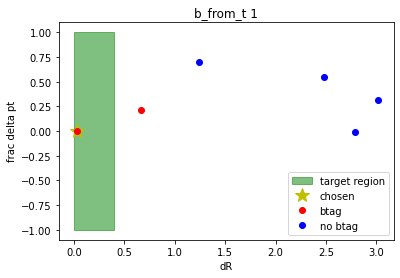

Decay product pt= 85924.64705390642
Jet pts= [8.67e+04, 8.55e+04, 6.79e+04, 5.87e+04, 3.86e+04, 2.58e+04]
Decay product phi= -1.8743471122351552
Jet phis= [2.18, -1.84, -1.71, 0.847, 0.586, -3.11]
Decay product eta= 0.5347170285408821
Jet etas= [2.21, 0.528, 1.18, -0.777, 0.203, 0.616]


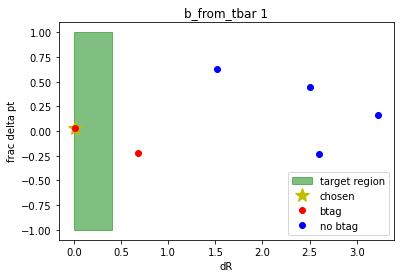

Decay product pt= 70109.66577722107
Jet pts= [8.67e+04, 8.55e+04, 6.79e+04, 5.87e+04, 3.86e+04, 2.58e+04]
Decay product phi= -1.711578047789178
Jet phis= [2.18, -1.84, -1.71, 0.847, 0.586, -3.11]
Decay product eta= 1.1947406519896824
Jet etas= [2.21, 0.528, 1.18, -0.777, 0.203, 0.616]


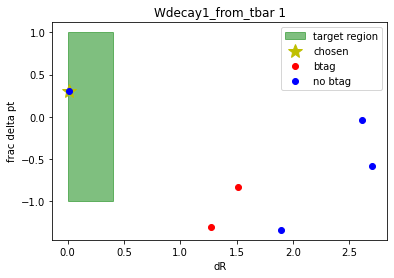

Decay product pt= 37074.7265625
Jet pts= [8.67e+04, 8.55e+04, 6.79e+04, 5.87e+04, 3.86e+04, 2.58e+04]
Decay product phi= -3.110818862915039
Jet phis= [2.18, -1.84, -1.71, 0.847, 0.586, -3.11]
Decay product eta= 0.5996900200843811
Jet etas= [2.21, 0.528, 1.18, -0.777, 0.203, 0.616]


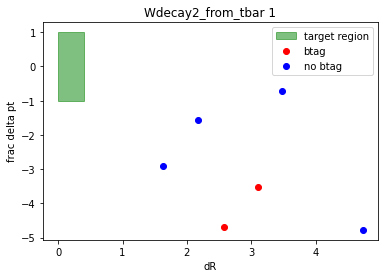

Decay product pt= 15014.2216796875
Jet pts= [8.67e+04, 8.55e+04, 6.79e+04, 5.87e+04, 3.86e+04, 2.58e+04]
Decay product phi= -0.5016816854476929
Jet phis= [2.18, -1.84, -1.71, 0.847, 0.586, -3.11]
Decay product eta= -1.6796337366104126
Jet etas= [2.21, 0.528, 1.18, -0.777, 0.203, 0.616]


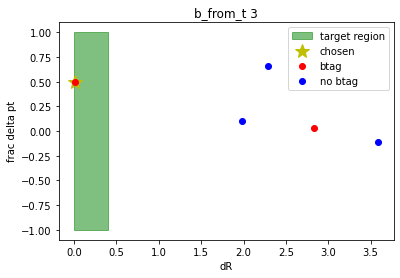

Decay product pt= 271659.2594025697
Jet pts= [3.02e+05, 2.62e+05, 2.45e+05, 1.37e+05, 9.39e+04]
Decay product phi= 2.9227151698140768
Jet phis= [0.73, -0.714, -1.41, 2.92, -1.25]
Decay product eta= 1.0939737168327932
Jet etas= [-1.75, 0.0768, 0.693, 1.08, 0.223]


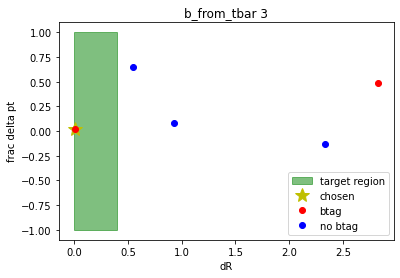

Decay product pt= 267438.9670611371
Jet pts= [3.02e+05, 2.62e+05, 2.45e+05, 1.37e+05, 9.39e+04]
Decay product phi= -0.7159211788945243
Jet phis= [0.73, -0.714, -1.41, 2.92, -1.25]
Decay product eta= 0.08174132135524512
Jet etas= [-1.75, 0.0768, 0.693, 1.08, 0.223]


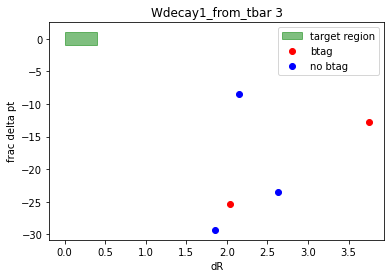

Decay product pt= 9969.443359375
Jet pts= [3.02e+05, 2.62e+05, 2.45e+05, 1.37e+05, 9.39e+04]
Decay product phi= -1.1108297109603882
Jet phis= [0.73, -0.714, -1.41, 2.92, -1.25]
Decay product eta= -1.9184693098068237
Jet etas= [-1.75, 0.0768, 0.693, 1.08, 0.223]


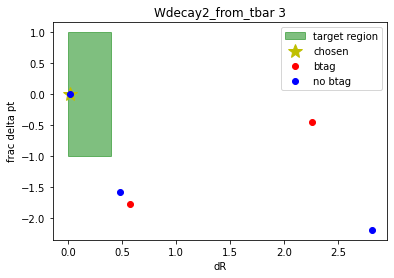

Decay product pt= 94790.578125
Jet pts= [3.02e+05, 2.62e+05, 2.45e+05, 1.37e+05, 9.39e+04]
Decay product phi= -1.2627748250961304
Jet phis= [0.73, -0.714, -1.41, 2.92, -1.25]
Decay product eta= 0.23863759636878967
Jet etas= [-1.75, 0.0768, 0.693, 1.08, 0.223]


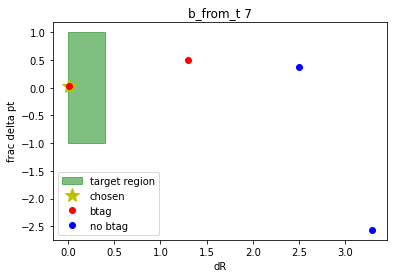

Decay product pt= 79174.45477819076
Jet pts= [2.82e+05, 7.64e+04, 4.99e+04, 3.89e+04]
Decay product phi= -0.3696696072932961
Jet phis= [3.04, -0.363, 2.02, -0.256]
Decay product eta= -0.4876863019502514
Jet etas= [-2.08, -0.493, -1.23, 0.806]


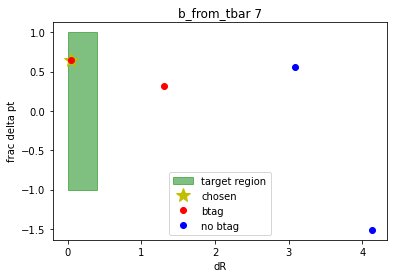

Decay product pt= 112319.79028934118
Jet pts= [2.82e+05, 7.64e+04, 4.99e+04, 3.89e+04]
Decay product phi= -0.29800450778742604
Jet phis= [3.04, -0.363, 2.02, -0.256]
Decay product eta= 0.8147820980940991
Jet etas= [-2.08, -0.493, -1.23, 0.806]


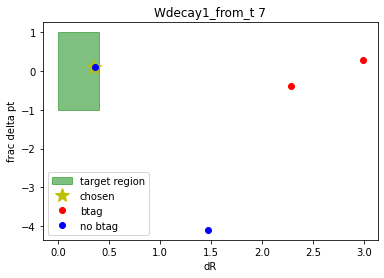

Decay product pt= 55383.73828125
Jet pts= [2.82e+05, 7.64e+04, 4.99e+04, 3.89e+04]
Decay product phi= 1.721886396408081
Jet phis= [3.04, -0.363, 2.02, -0.256]
Decay product eta= -1.4288884401321411
Jet etas= [-2.08, -0.493, -1.23, 0.806]


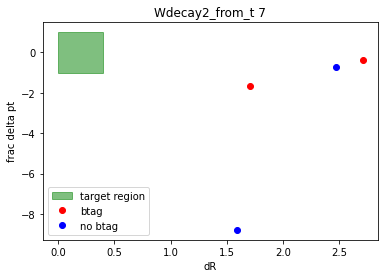

Decay product pt= 28848.4375
Jet pts= [2.82e+05, 7.64e+04, 4.99e+04, 3.89e+04]
Decay product phi= -1.803449273109436
Jet phis= [3.04, -0.363, 2.02, -0.256]
Decay product eta= 0.0
Jet etas= [-2.08, -0.493, -1.23, 0.806]


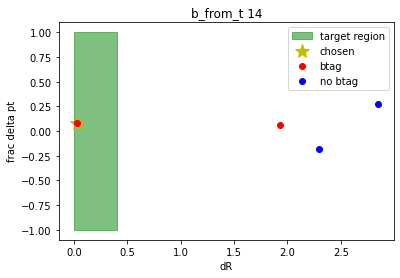

Decay product pt= 66061.60245526902
Jet pts= [7.82e+04, 6.22e+04, 6.05e+04, 4.8e+04]
Decay product phi= 3.0060727566161205
Jet phis= [0.798, 1.1, 3.03, -2.41]
Decay product eta= 0.24258902628926607
Jet etas= [0.886, -0.0709, 0.241, -2.47]


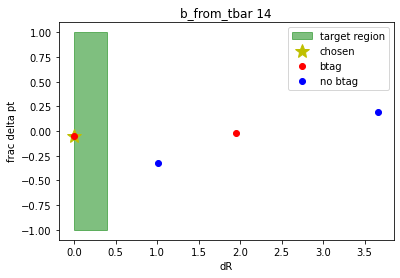

Decay product pt= 59174.028086867176
Jet pts= [7.82e+04, 6.22e+04, 6.05e+04, 4.8e+04]
Decay product phi= 1.102695387497823
Jet phis= [0.798, 1.1, 3.03, -2.41]
Decay product eta= -0.07413369147110543
Jet etas= [0.886, -0.0709, 0.241, -2.47]


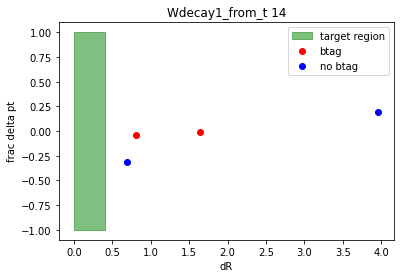

Decay product pt= 59797.578125
Jet pts= [7.82e+04, 6.22e+04, 6.05e+04, 4.8e+04]
Decay product phi= 1.4505826234817505
Jet phis= [0.798, 1.1, 3.03, -2.41]
Decay product eta= 0.660557210445404
Jet etas= [0.886, -0.0709, 0.241, -2.47]


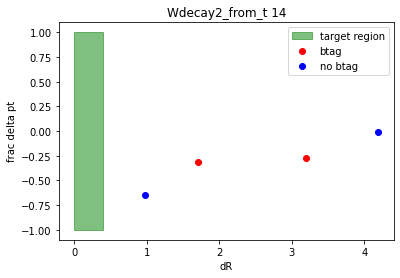

Decay product pt= 47537.03515625
Jet pts= [7.82e+04, 6.22e+04, 6.05e+04, 4.8e+04]
Decay product phi= -0.16635073721408844
Jet phis= [0.798, 1.1, 3.03, -2.41]
Decay product eta= 0.0
Jet etas= [0.886, -0.0709, 0.241, -2.47]


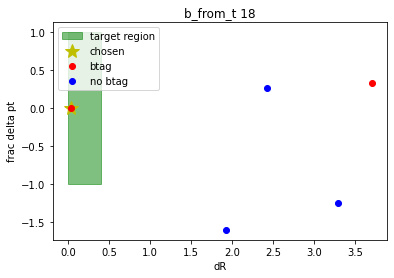

Decay product pt= 53510.486449425895
Jet pts= [1.39e+05, 1.2e+05, 5.34e+04, 3.95e+04, 3.6e+04]
Decay product phi= 1.7411763832128475
Jet phis= [1.98, -1.33, 1.78, -2.25, -1.79]
Decay product eta= -1.243030130864652
Jet etas= [0.662, -0.0693, -1.24, -0.474, 1.23]


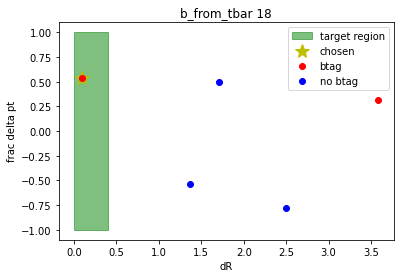

Decay product pt= 78235.20648638297
Jet pts= [1.39e+05, 1.2e+05, 5.34e+04, 3.95e+04, 3.6e+04]
Decay product phi= -1.8640194203700542
Jet phis= [1.98, -1.33, 1.78, -2.25, -1.79]
Decay product eta= 1.1857657833209523
Jet etas= [0.662, -0.0693, -1.24, -0.474, 1.23]


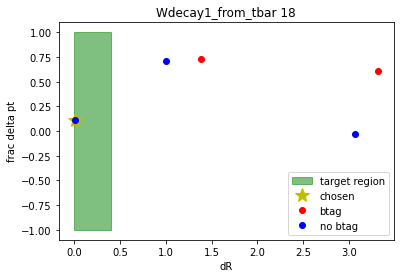

Decay product pt= 134974.546875
Jet pts= [1.39e+05, 1.2e+05, 5.34e+04, 3.95e+04, 3.6e+04]
Decay product phi= -1.3331888914108276
Jet phis= [1.98, -1.33, 1.78, -2.25, -1.79]
Decay product eta= -0.07630380988121033
Jet etas= [0.662, -0.0693, -1.24, -0.474, 1.23]


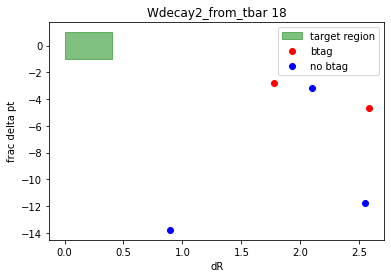

Decay product pt= 9413.4873046875
Jet pts= [1.39e+05, 1.2e+05, 5.34e+04, 3.95e+04, 3.6e+04]
Decay product phi= 2.7196693420410156
Jet phis= [1.98, -1.33, 1.78, -2.25, -1.79]
Decay product eta= 1.1618913412094116
Jet etas= [0.662, -0.0693, -1.24, -0.474, 1.23]


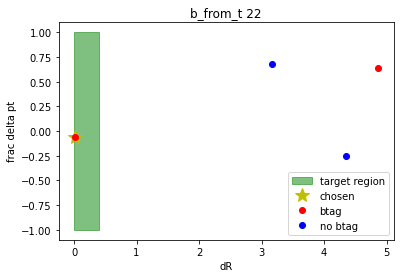

Decay product pt= 87156.15357590005
Jet pts= [1.09e+05, 9.27e+04, 3.12e+04, 2.8e+04]
Decay product phi= 1.684468313770588
Jet phis= [-2.2, 1.66, -2.34, -1.3]
Decay product eta= -2.0636367986268174
Jet etas= [1.57, -2.06, 2.25, -1.03]


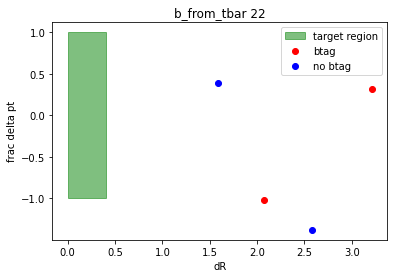

Decay product pt= 45835.35201364556
Jet pts= [1.09e+05, 9.27e+04, 3.12e+04, 2.8e+04]
Decay product phi= -2.883590225796995
Jet phis= [-2.2, 1.66, -2.34, -1.3]
Decay product eta= -0.919033717947338
Jet etas= [1.57, -2.06, 2.25, -1.03]


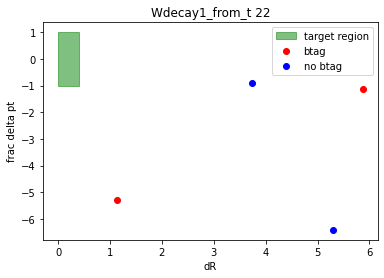

Decay product pt= 14719.208984375
Jet pts= [1.09e+05, 9.27e+04, 3.12e+04, 2.8e+04]
Decay product phi= 1.7382230758666992
Jet phis= [-2.2, 1.66, -2.34, -1.3]
Decay product eta= -3.1876060962677
Jet etas= [1.57, -2.06, 2.25, -1.03]


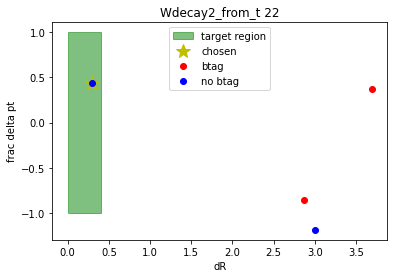

Decay product pt= 49901.72265625
Jet pts= [1.09e+05, 9.27e+04, 3.12e+04, 2.8e+04]
Decay product phi= -1.0848262310028076
Jet phis= [-2.2, 1.66, -2.34, -1.3]
Decay product eta= 0.0
Jet etas= [1.57, -2.06, 2.25, -1.03]


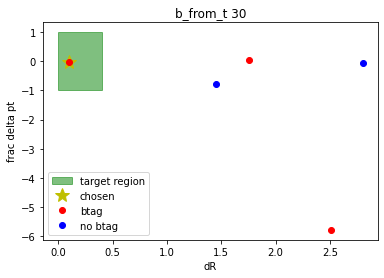

Decay product pt= 26761.318076376847
Jet pts= [1.82e+05, 4.72e+04, 2.8e+04, 2.74e+04, 2.51e+04]
Decay product phi= 0.1720007034436617
Jet phis= [-2.13, 0.841, -2.59, 0.101, 1.91]
Decay product eta= 0.17955321275132974
Jet etas= [-0.835, -1.11, 0.63, 0.248, -0.0934]


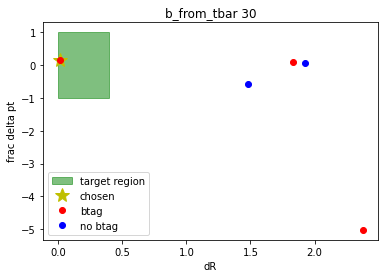

Decay product pt= 30175.01721568018
Jet pts= [1.82e+05, 4.72e+04, 2.8e+04, 2.74e+04, 2.51e+04]
Decay product phi= 1.9036044763515223
Jet phis= [-2.13, 0.841, -2.59, 0.101, 1.91]
Decay product eta= -0.08272009435763607
Jet etas= [-0.835, -1.11, 0.63, 0.248, -0.0934]


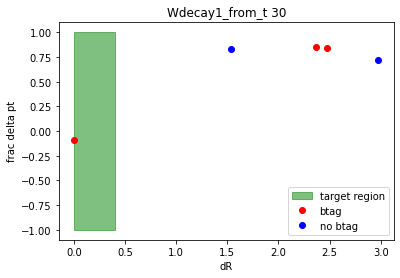

Decay product pt= 167269.609375
Jet pts= [1.82e+05, 4.72e+04, 2.8e+04, 2.74e+04, 2.51e+04]
Decay product phi= -2.124058961868286
Jet phis= [-2.13, 0.841, -2.59, 0.101, 1.91]
Decay product eta= -0.8347541093826294
Jet etas= [-0.835, -1.11, 0.63, 0.248, -0.0934]


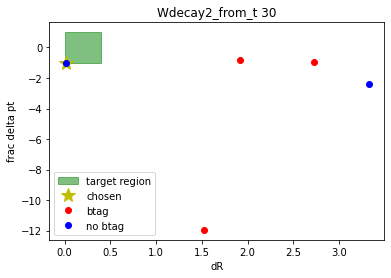

Decay product pt= 14019.4072265625
Jet pts= [1.82e+05, 4.72e+04, 2.8e+04, 2.74e+04, 2.51e+04]
Decay product phi= -2.6014351844787598
Jet phis= [-2.13, 0.841, -2.59, 0.101, 1.91]
Decay product eta= 0.0
Jet etas= [-0.835, -1.11, 0.63, 0.248, -0.0934]


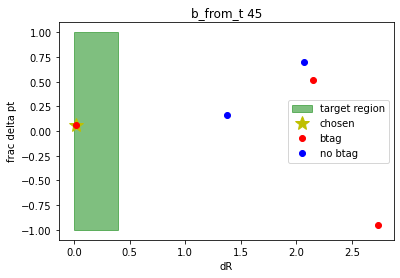

Decay product pt= 86419.02467029398
Jet pts= [1.69e+05, 8.12e+04, 7.24e+04, 4.16e+04, 2.63e+04]
Decay product phi= 1.0646789303750612
Jet phis= [-1.56, 1.07, 1.54, -0.574, 1.04]
Decay product eta= 0.8052001247535078
Jet etas= [0.0221, 0.82, -0.483, -0.589, -1.26]


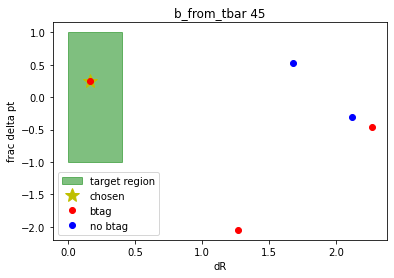

Decay product pt= 55462.5698944014
Jet pts= [1.69e+05, 8.12e+04, 7.24e+04, 4.16e+04, 2.63e+04]
Decay product phi= -0.5566469638270934
Jet phis= [-1.56, 1.07, 1.54, -0.574, 1.04]
Decay product eta= -0.754349218814882
Jet etas= [0.0221, 0.82, -0.483, -0.589, -1.26]


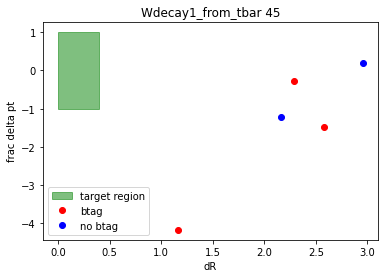

Decay product pt= 32678.900390625
Jet pts= [1.69e+05, 8.12e+04, 7.24e+04, 4.16e+04, 2.63e+04]
Decay product phi= -2.7024104595184326
Jet phis= [-1.56, 1.07, 1.54, -0.574, 1.04]
Decay product eta= 0.24072864651679993
Jet etas= [0.0221, 0.82, -0.483, -0.589, -1.26]


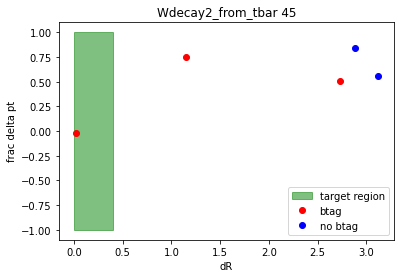

Decay product pt= 165042.484375
Jet pts= [1.69e+05, 8.12e+04, 7.24e+04, 4.16e+04, 2.63e+04]
Decay product phi= -1.542324423789978
Jet phis= [-1.56, 1.07, 1.54, -0.574, 1.04]
Decay product eta= 0.028855087235569954
Jet etas= [0.0221, 0.82, -0.483, -0.589, -1.26]


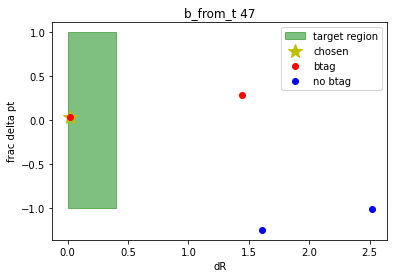

Decay product pt= 50333.45149525759
Jet pts= [1.13e+05, 1.01e+05, 4.88e+04, 3.6e+04]
Decay product phi= 2.277980457014576
Jet phis= [-2.5, 0.618, 2.26, -2.69]
Decay product eta= -1.7223163180544643
Jet etas= [-2.29, 0.174, -1.72, -1.13]


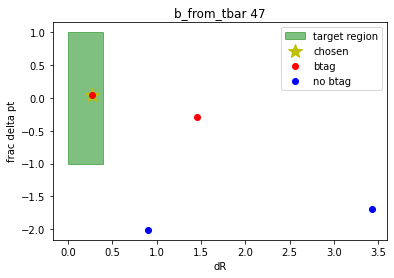

Decay product pt= 37622.71413511642
Jet pts= [1.13e+05, 1.01e+05, 4.88e+04, 3.6e+04]
Decay product phi= -2.6135732486530694
Jet phis= [-2.5, 0.618, 2.26, -2.69]
Decay product eta= -1.3899964580699422
Jet etas= [-2.29, 0.174, -1.72, -1.13]


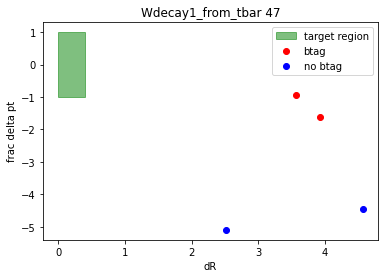

Decay product pt= 18580.869140625
Jet pts= [1.13e+05, 1.01e+05, 4.88e+04, 3.6e+04]
Decay product phi= -0.8162760138511658
Jet phis= [-2.5, 0.618, 2.26, -2.69]
Decay product eta= -4.155587196350098
Jet etas= [-2.29, 0.174, -1.72, -1.13]


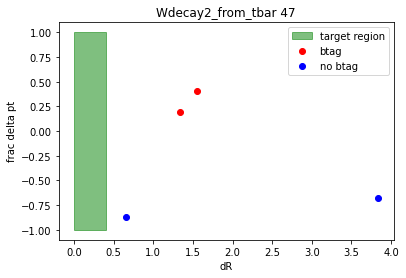

Decay product pt= 60599.69921875
Jet pts= [1.13e+05, 1.01e+05, 4.88e+04, 3.6e+04]
Decay product phi= -3.053389072418213
Jet phis= [-2.5, 0.618, 2.26, -2.69]
Decay product eta= -2.6412951946258545
Jet etas= [-2.29, 0.174, -1.72, -1.13]


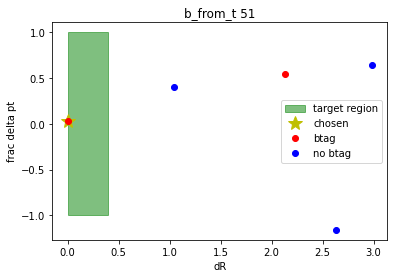

Decay product pt= 140164.47995175025
Jet pts= [3.03e+05, 1.36e+05, 8.4e+04, 6.39e+04, 5.09e+04]
Decay product phi= -2.449042778970255
Jet phis= [1.22, -2.45, -1.95, -0.321, 0.392]
Decay product eta= 0.7178437038690674
Jet etas= [0.436, 0.719, -0.196, 0.613, 1.63]


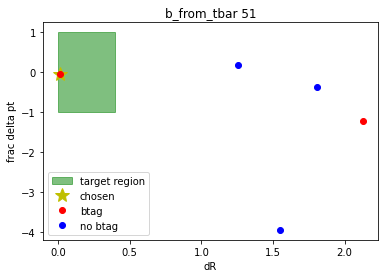

Decay product pt= 61282.594634585956
Jet pts= [3.03e+05, 1.36e+05, 8.4e+04, 6.39e+04, 5.09e+04]
Decay product phi= -0.3250104979744486
Jet phis= [1.22, -2.45, -1.95, -0.321, 0.392]
Decay product eta= 0.598823623177884
Jet etas= [0.436, 0.719, -0.196, 0.613, 1.63]


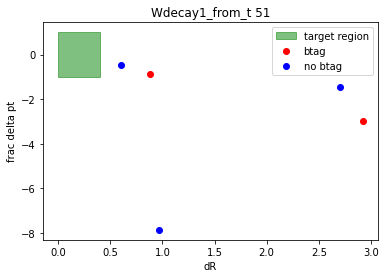

Decay product pt= 34134.5
Jet pts= [3.03e+05, 1.36e+05, 8.4e+04, 6.39e+04, 5.09e+04]
Decay product phi= 0.4548599123954773
Jet phis= [1.22, -2.45, -1.95, -0.321, 0.392]
Decay product eta= 1.0371683835983276
Jet etas= [0.436, 0.719, -0.196, 0.613, 1.63]


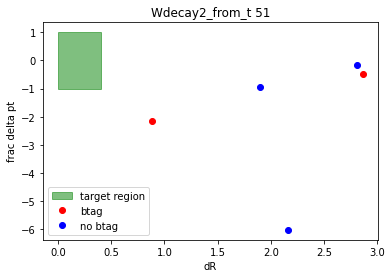

Decay product pt= 43143.52734375
Jet pts= [3.03e+05, 1.36e+05, 8.4e+04, 6.39e+04, 5.09e+04]
Decay product phi= -3.094684600830078
Jet phis= [1.22, -2.45, -1.95, -0.321, 0.392]
Decay product eta= 0.0
Jet etas= [0.436, 0.719, -0.196, 0.613, 1.63]


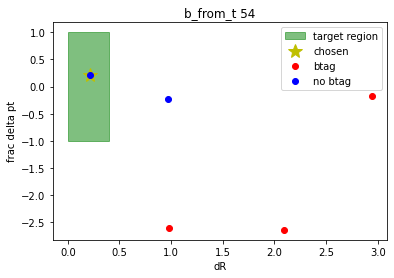

Decay product pt= 43195.668056772556
Jet pts= [1.57e+05, 1.56e+05, 5.29e+04, 5.11e+04, 3.43e+04]
Decay product phi= 2.6316171356722906
Jet phis= [0.616, -2.95, 2.48, -0.222, 2.55]
Decay product eta= 1.810096136137645
Jet etas= [2.38, 1.14, 0.857, 1.08, 1.61]


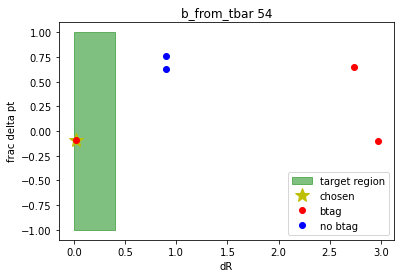

Decay product pt= 143360.526594264
Jet pts= [1.57e+05, 1.56e+05, 5.29e+04, 5.11e+04, 3.43e+04]
Decay product phi= -2.9587171902132186
Jet phis= [0.616, -2.95, 2.48, -0.222, 2.55]
Decay product eta= 1.1455409571743307
Jet etas= [2.38, 1.14, 0.857, 1.08, 1.61]


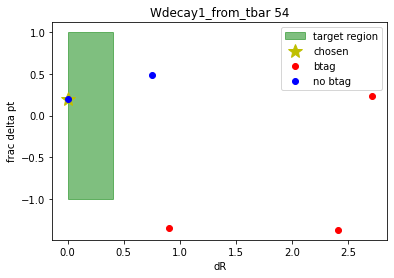

Decay product pt= 66288.140625
Jet pts= [1.57e+05, 1.56e+05, 5.29e+04, 5.11e+04, 3.43e+04]
Decay product phi= 2.481494665145874
Jet phis= [0.616, -2.95, 2.48, -0.222, 2.55]
Decay product eta= 0.8548423051834106
Jet etas= [2.38, 1.14, 0.857, 1.08, 1.61]


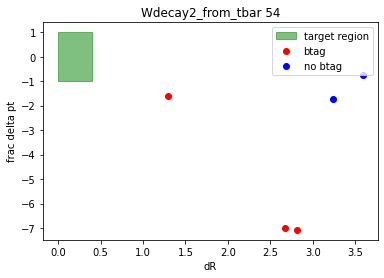

Decay product pt= 19466.623046875
Jet pts= [1.57e+05, 1.56e+05, 5.29e+04, 5.11e+04, 3.43e+04]
Decay product phi= -0.6044014692306519
Jet phis= [0.616, -2.95, 2.48, -0.222, 2.55]
Decay product eta= -0.15567822754383087
Jet etas= [2.38, 1.14, 0.857, 1.08, 1.61]


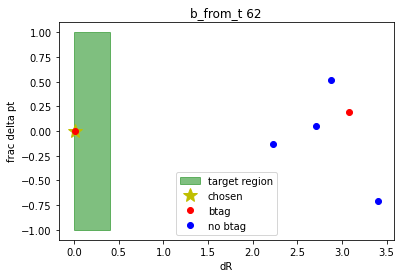

Decay product pt= 75385.59113274478
Jet pts= [1.29e+05, 8.5e+04, 7.56e+04, 7.13e+04, 6.05e+04, 3.64e+04]
Decay product phi= 2.626833062496962
Jet phis= [-0.655, 2.72, 2.64, -2.97, -1.32, -0.132]
Decay product eta= 1.7532959320047639
Jet etas= [0.138, -0.473, 1.75, -0.872, -0.255, 0.928]


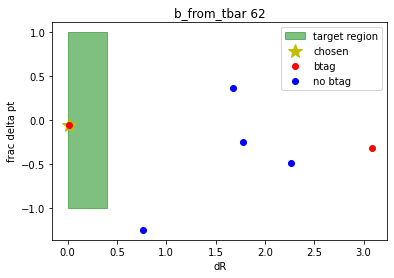

Decay product pt= 57104.4822065408
Jet pts= [1.29e+05, 8.5e+04, 7.56e+04, 7.13e+04, 6.05e+04, 3.64e+04]
Decay product phi= -1.308159226401975
Jet phis= [-0.655, 2.72, 2.64, -2.97, -1.32, -0.132]
Decay product eta= -0.2641524239466811
Jet etas= [0.138, -0.473, 1.75, -0.872, -0.255, 0.928]


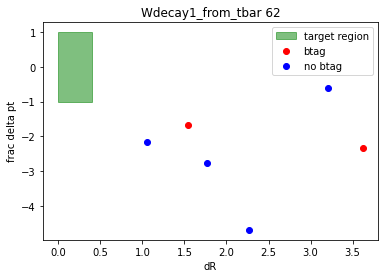

Decay product pt= 22588.96484375
Jet pts= [1.29e+05, 8.5e+04, 7.56e+04, 7.13e+04, 6.05e+04, 3.64e+04]
Decay product phi= -2.161324977874756
Jet phis= [-0.655, 2.72, 2.64, -2.97, -1.32, -0.132]
Decay product eta= -1.549214482307434
Jet etas= [0.138, -0.473, 1.75, -0.872, -0.255, 0.928]


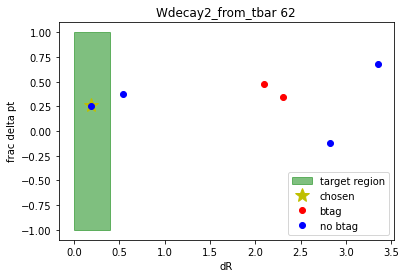

Decay product pt= 114626.0390625
Jet pts= [1.29e+05, 8.5e+04, 7.56e+04, 7.13e+04, 6.05e+04, 3.64e+04]
Decay product phi= 2.8892464637756348
Jet phis= [-0.655, 2.72, 2.64, -2.97, -1.32, -0.132]
Decay product eta= -0.5401162505149841
Jet etas= [0.138, -0.473, 1.75, -0.872, -0.255, 0.928]


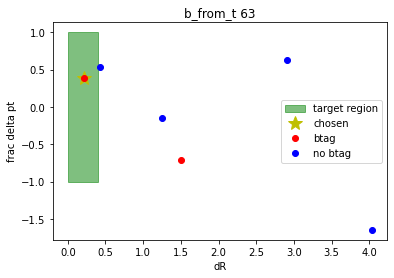

Decay product pt= 89080.7804736851
Jet pts= [2.36e+05, 1.53e+05, 1.02e+05, 5.43e+04, 4.12e+04, 3.3e+04]
Decay product phi= 1.767789332342959
Jet phis= [-1.42, 1.07, 2.53, 1.72, 1.89, -1.1]
Decay product eta= -1.7327662342476287
Jet etas= [0.856, -0.408, -0.738, -1.94, -1.33, -1.23]


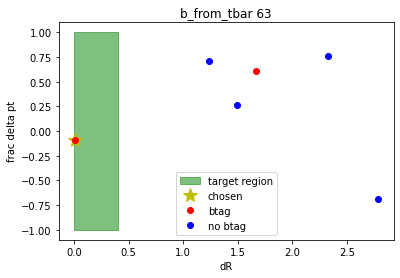

Decay product pt= 139404.7369630501
Jet pts= [2.36e+05, 1.53e+05, 1.02e+05, 5.43e+04, 4.12e+04, 3.3e+04]
Decay product phi= 1.0750131793672084
Jet phis= [-1.42, 1.07, 2.53, 1.72, 1.89, -1.1]
Decay product eta= -0.3984511798735664
Jet etas= [0.856, -0.408, -0.738, -1.94, -1.33, -1.23]


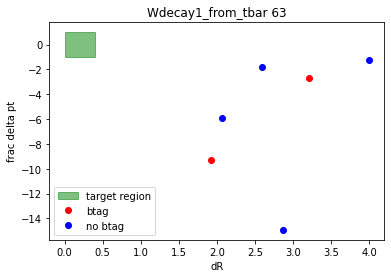

Decay product pt= 14814.7197265625
Jet pts= [2.36e+05, 1.53e+05, 1.02e+05, 5.43e+04, 4.12e+04, 3.3e+04]
Decay product phi= 2.0240638256073
Jet phis= [-1.42, 1.07, 2.53, 1.72, 1.89, -1.1]
Decay product eta= 1.2600488662719727
Jet etas= [0.856, -0.408, -0.738, -1.94, -1.33, -1.23]


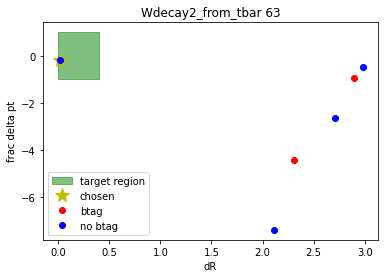

Decay product pt= 28106.75
Jet pts= [2.36e+05, 1.53e+05, 1.02e+05, 5.43e+04, 4.12e+04, 3.3e+04]
Decay product phi= -1.082332968711853
Jet phis= [-1.42, 1.07, 2.53, 1.72, 1.89, -1.1]
Decay product eta= -1.2264271974563599
Jet etas= [0.856, -0.408, -0.738, -1.94, -1.33, -1.23]


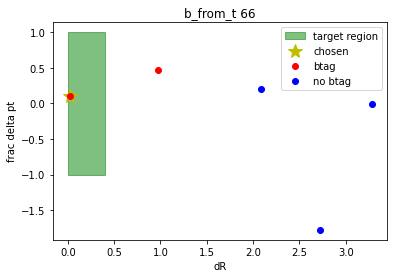

Decay product pt= 62888.013640965386
Jet pts= [1.75e+05, 6.36e+04, 5.65e+04, 5.03e+04, 3.3e+04]
Decay product phi= -2.1174712544279695
Jet phis= [1.54, 0.92, -2.12, 2.21, -2.13]
Decay product eta= -1.824872461518834
Jet etas= [-1.12, -0.573, -1.85, -1.09, -0.85]


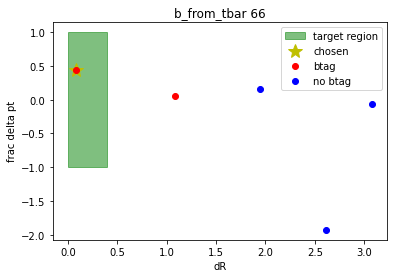

Decay product pt= 59640.592417069165
Jet pts= [1.75e+05, 6.36e+04, 5.65e+04, 5.03e+04, 3.3e+04]
Decay product phi= -2.154585474988094
Jet phis= [1.54, 0.92, -2.12, 2.21, -2.13]
Decay product eta= -0.7677209186458938
Jet etas= [-1.12, -0.573, -1.85, -1.09, -0.85]


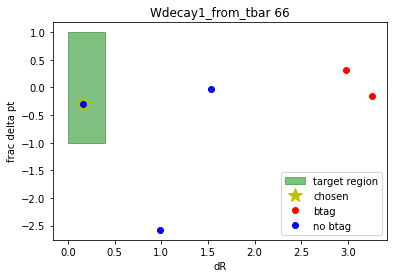

Decay product pt= 48788.84765625
Jet pts= [1.75e+05, 6.36e+04, 5.65e+04, 5.03e+04, 3.3e+04]
Decay product phi= 0.8179879188537598
Jet phis= [1.54, 0.92, -2.12, 2.21, -2.13]
Decay product eta= -0.44235390424728394
Jet etas= [-1.12, -0.573, -1.85, -1.09, -0.85]


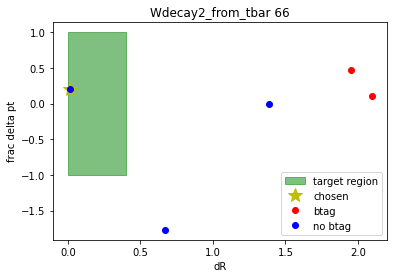

Decay product pt= 63016.203125
Jet pts= [1.75e+05, 6.36e+04, 5.65e+04, 5.03e+04, 3.3e+04]
Decay product phi= 2.2114675045013428
Jet phis= [1.54, 0.92, -2.12, 2.21, -2.13]
Decay product eta= -1.0754168033599854
Jet etas= [-1.12, -0.573, -1.85, -1.09, -0.85]


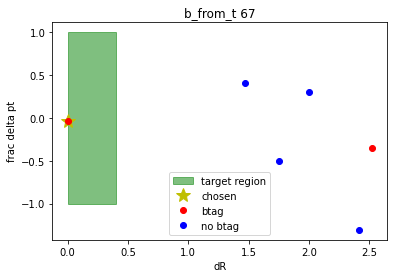

Decay product pt= 53270.86798199265
Jet pts= [1.23e+05, 7.99e+04, 7.23e+04, 5.5e+04, 3.74e+04, 3.16e+04]
Decay product phi= 0.9862849432752645
Jet phis= [2.49, -0.694, 3.13, 0.987, -0.127, 2.45]
Decay product eta= 0.48098150388697253
Jet etas= [-1.41, 0.981, 1.82, 0.483, -1.18, 0.357]


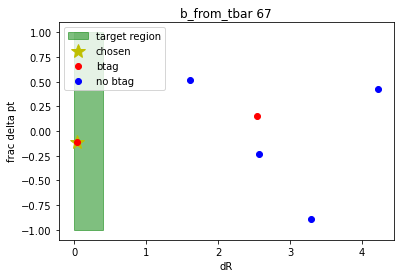

Decay product pt= 64971.088919657166
Jet pts= [1.23e+05, 7.99e+04, 7.23e+04, 5.5e+04, 3.74e+04, 3.16e+04]
Decay product phi= -3.120609956926949
Jet phis= [2.49, -0.694, 3.13, 0.987, -0.127, 2.45]
Decay product eta= 1.8054951652125728
Jet etas= [-1.41, 0.981, 1.82, 0.483, -1.18, 0.357]


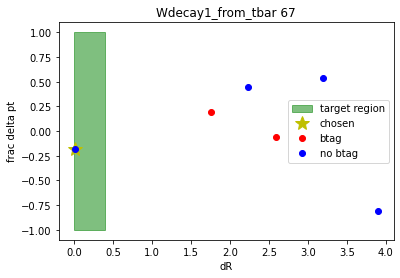

Decay product pt= 67874.125
Jet pts= [1.23e+05, 7.99e+04, 7.23e+04, 5.5e+04, 3.74e+04, 3.16e+04]
Decay product phi= -0.7022241353988647
Jet phis= [2.49, -0.694, 3.13, 0.987, -0.127, 2.45]
Decay product eta= 0.972590446472168
Jet etas= [-1.41, 0.981, 1.82, 0.483, -1.18, 0.357]


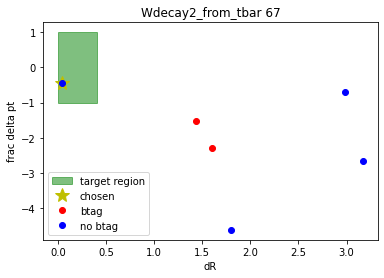

Decay product pt= 21882.630859375
Jet pts= [1.23e+05, 7.99e+04, 7.23e+04, 5.5e+04, 3.74e+04, 3.16e+04]
Decay product phi= 2.415904998779297
Jet phis= [2.49, -0.694, 3.13, 0.987, -0.127, 2.45]
Decay product eta= 0.38221538066864014
Jet etas= [-1.41, 0.981, 1.82, 0.483, -1.18, 0.357]


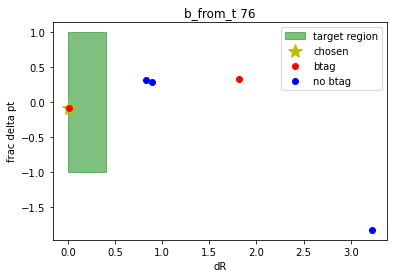

Decay product pt= 87929.23708008658
Jet pts= [2.48e+05, 9.56e+04, 6.27e+04, 6.01e+04, 5.85e+04]
Decay product phi= -1.2807893498686131
Jet phis= [1.88, -1.27, -0.871, -0.728, 0.219]
Decay product eta= -0.3399200182864633
Jet etas= [-1.16, -0.352, 0.45, -0.951, 0.679]


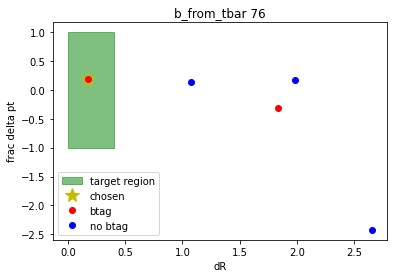

Decay product pt= 72457.82034951459
Jet pts= [2.48e+05, 9.56e+04, 6.27e+04, 6.01e+04, 5.85e+04]
Decay product phi= 0.12900497289807422
Jet phis= [1.88, -1.27, -0.871, -0.728, 0.219]
Decay product eta= 0.8345305520031279
Jet etas= [-1.16, -0.352, 0.45, -0.951, 0.679]


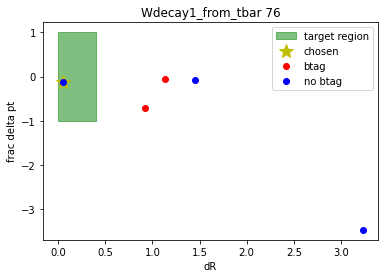

Decay product pt= 55585.09765625
Jet pts= [2.48e+05, 9.56e+04, 6.27e+04, 6.01e+04, 5.85e+04]
Decay product phi= -0.8940849900245667
Jet phis= [1.88, -1.27, -0.871, -0.728, 0.219]
Decay product eta= 0.4918134808540344
Jet etas= [-1.16, -0.352, 0.45, -0.951, 0.679]


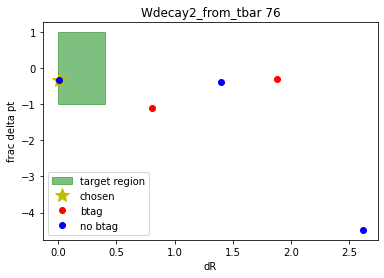

Decay product pt= 45275.62890625
Jet pts= [2.48e+05, 9.56e+04, 6.27e+04, 6.01e+04, 5.85e+04]
Decay product phi= -0.72648686170578
Jet phis= [1.88, -1.27, -0.871, -0.728, 0.219]
Decay product eta= -0.9425858855247498
Jet etas= [-1.16, -0.352, 0.45, -0.951, 0.679]


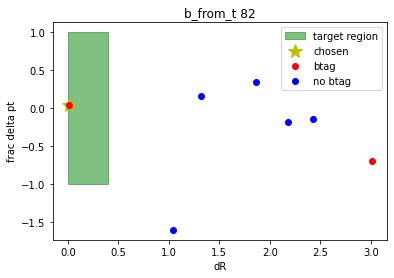

Decay product pt= 45584.50930859631
Jet pts= [1.18e+05, 7.72e+04, 5.39e+04, 5.17e+04, 4.34e+04, 3.82e+04, 2.98e+04]
Decay product phi= 2.896783031978181
Jet phis= [2.7, 0.121, -3.11, 0.594, 2.88, -2.92, -2.01]
Decay product eta= -1.5628696129955992
Jet etas= [-0.544, -0.392, 0.595, -2.32, -1.57, -0.326, -0.311]


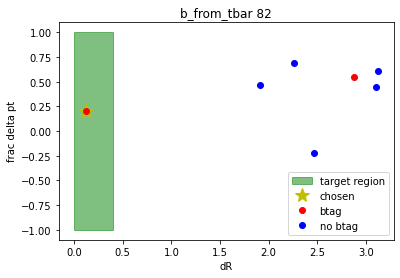

Decay product pt= 96855.81470078875
Jet pts= [1.18e+05, 7.72e+04, 5.39e+04, 5.17e+04, 4.34e+04, 3.82e+04, 2.98e+04]
Decay product phi= 0.23961619407858148
Jet phis= [2.7, 0.121, -3.11, 0.594, 2.88, -2.92, -2.01]
Decay product eta= -0.43387794533381246
Jet etas= [-0.544, -0.392, 0.595, -2.32, -1.57, -0.326, -0.311]


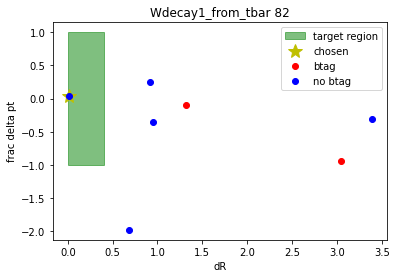

Decay product pt= 39727.66015625
Jet pts= [1.18e+05, 7.72e+04, 5.39e+04, 5.17e+04, 4.34e+04, 3.82e+04, 2.98e+04]
Decay product phi= -2.9296441078186035
Jet phis= [2.7, 0.121, -3.11, 0.594, 2.88, -2.92, -2.01]
Decay product eta= -0.3400537073612213
Jet etas= [-0.544, -0.392, 0.595, -2.32, -1.57, -0.326, -0.311]


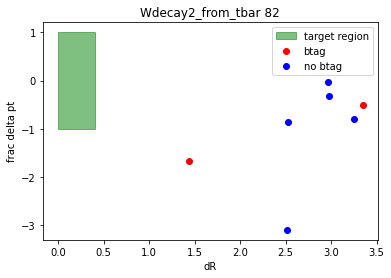

Decay product pt= 28936.1171875
Jet pts= [1.18e+05, 7.72e+04, 5.39e+04, 5.17e+04, 4.34e+04, 3.82e+04, 2.98e+04]
Decay product phi= 0.6723222136497498
Jet phis= [2.7, 0.121, -3.11, 0.594, 2.88, -2.92, -2.01]
Decay product eta= 0.9374276399612427
Jet etas= [-0.544, -0.392, 0.595, -2.32, -1.57, -0.326, -0.311]


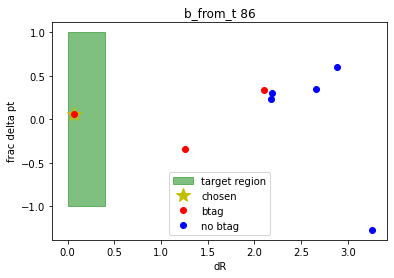

Decay product pt= 70364.76758409197
Jet pts= [1.6e+05, 9.45e+04, 6.6e+04, 5.42e+04, 4.95e+04, 4.63e+04, 4.61e+04, 2.85e+04]
Decay product phi= -1.1469591637966372
Jet phis= [-3.08, 0.0619, -1.09, 0.846, 1.02, 0.949, -0.499, 1.43]
Decay product eta= 0.2189048515677515
Jet etas= [-2.4, 0.552, 0.188, -0.647, 0.481, 0.00811, -2.36, 1.52]


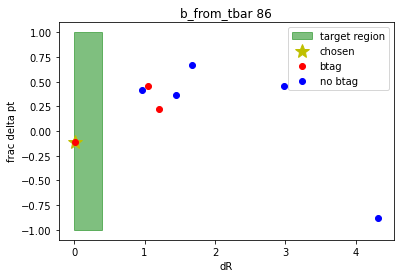

Decay product pt= 85057.81735426866
Jet pts= [1.6e+05, 9.45e+04, 6.6e+04, 5.42e+04, 4.95e+04, 4.63e+04, 4.61e+04, 2.85e+04]
Decay product phi= 0.053567118812927195
Jet phis= [-3.08, 0.0619, -1.09, 0.846, 1.02, 0.949, -0.499, 1.43]
Decay product eta= 0.5661821897157306
Jet etas= [-2.4, 0.552, 0.188, -0.647, 0.481, 0.00811, -2.36, 1.52]


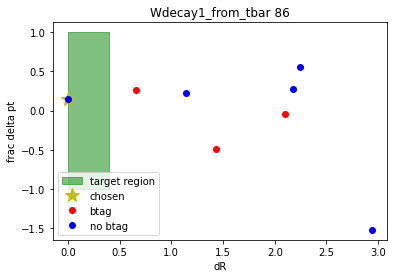

Decay product pt= 63319.02734375
Jet pts= [1.6e+05, 9.45e+04, 6.6e+04, 5.42e+04, 4.95e+04, 4.63e+04, 4.61e+04, 2.85e+04]
Decay product phi= 0.8425273895263672
Jet phis= [-3.08, 0.0619, -1.09, 0.846, 1.02, 0.949, -0.499, 1.43]
Decay product eta= -0.6439694166183472
Jet etas= [-2.4, 0.552, 0.188, -0.647, 0.481, 0.00811, -2.36, 1.52]


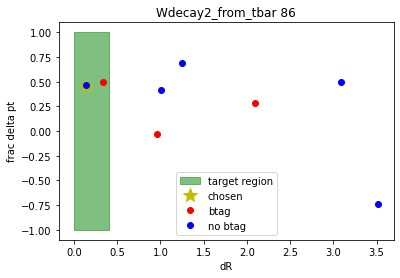

Decay product pt= 91984.2109375
Jet pts= [1.6e+05, 9.45e+04, 6.6e+04, 5.42e+04, 4.95e+04, 4.63e+04, 4.61e+04, 2.85e+04]
Decay product phi= 0.9959400296211243
Jet phis= [-3.08, 0.0619, -1.09, 0.846, 1.02, 0.949, -0.499, 1.43]
Decay product eta= 0.34437188506126404
Jet etas= [-2.4, 0.552, 0.188, -0.647, 0.481, 0.00811, -2.36, 1.52]


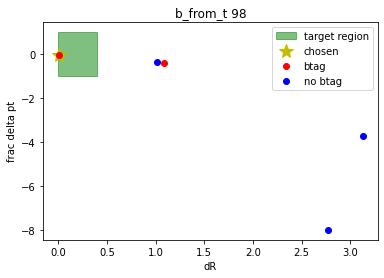

Decay product pt= 75451.50061650432
Jet pts= [6.77e+05, 3.55e+05, 1.07e+05, 1.02e+05, 7.89e+04]
Decay product phi= -1.7672884708947327
Jet phis= [1.8, 0.522, -2.23, -0.86, -1.77]
Decay product eta= 1.8460636674927002
Jet etas= [1.27, -0.282, 0.86, 1.39, 1.85]


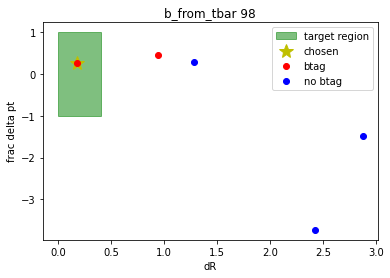

Decay product pt= 143075.7103703173
Jet pts= [6.77e+05, 3.55e+05, 1.07e+05, 1.02e+05, 7.89e+04]
Decay product phi= -2.0724359291138366
Jet phis= [1.8, 0.522, -2.23, -0.86, -1.77]
Decay product eta= 0.9570753271428495
Jet etas= [1.27, -0.282, 0.86, 1.39, 1.85]


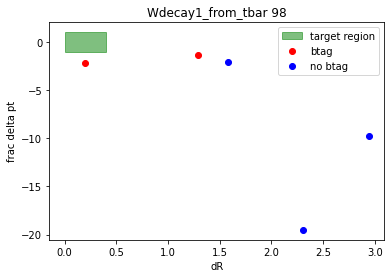

Decay product pt= 33014.9765625
Jet pts= [6.77e+05, 3.55e+05, 1.07e+05, 1.02e+05, 7.89e+04]
Decay product phi= -2.2642669677734375
Jet phis= [1.8, 0.522, -2.23, -0.86, -1.77]
Decay product eta= 0.6622267961502075
Jet etas= [1.27, -0.282, 0.86, 1.39, 1.85]


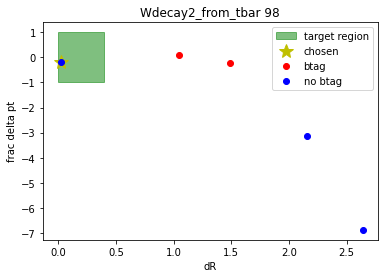

Decay product pt= 85969.3515625
Jet pts= [6.77e+05, 3.55e+05, 1.07e+05, 1.02e+05, 7.89e+04]
Decay product phi= -0.8349606990814209
Jet phis= [1.8, 0.522, -2.23, -0.86, -1.77]
Decay product eta= 1.3901041746139526
Jet etas= [1.27, -0.282, 0.86, 1.39, 1.85]


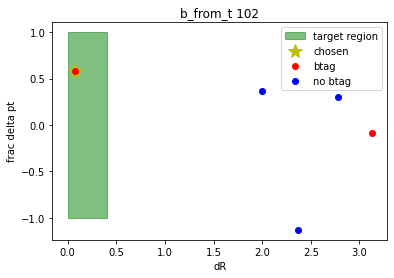

Decay product pt= 63816.05886428813
Jet pts= [1.36e+05, 6.96e+04, 4.48e+04, 4.05e+04, 2.68e+04]
Decay product phi= 1.7974239473047522
Jet phis= [0.178, -1.45, -0.809, -2.96, 1.75]
Decay product eta= 1.0586276421556655
Jet etas= [-0.675, 0.276, 0.0894, -0.238, 0.996]


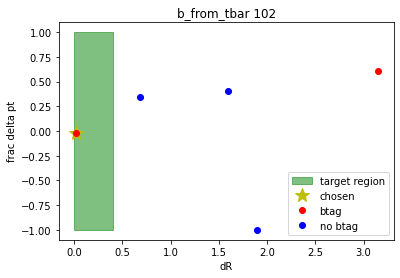

Decay product pt= 67924.92368467487
Jet pts= [1.36e+05, 6.96e+04, 4.48e+04, 4.05e+04, 2.68e+04]
Decay product phi= -1.4561918890079617
Jet phis= [0.178, -1.45, -0.809, -2.96, 1.75]
Decay product eta= 0.2927850272085629
Jet etas= [-0.675, 0.276, 0.0894, -0.238, 0.996]


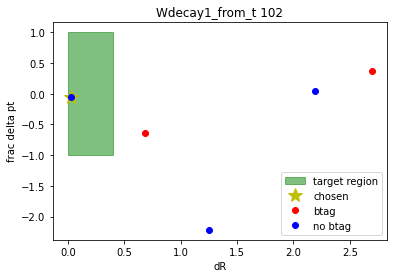

Decay product pt= 42257.2109375
Jet pts= [1.36e+05, 6.96e+04, 4.48e+04, 4.05e+04, 2.68e+04]
Decay product phi= -0.7932589054107666
Jet phis= [0.178, -1.45, -0.809, -2.96, 1.75]
Decay product eta= 0.10740256309509277
Jet etas= [-0.675, 0.276, 0.0894, -0.238, 0.996]


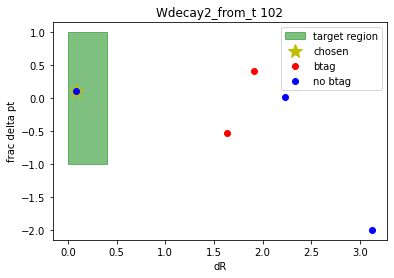

Decay product pt= 45351.953125
Jet pts= [1.36e+05, 6.96e+04, 4.48e+04, 4.05e+04, 2.68e+04]
Decay product phi= -3.021322011947632
Jet phis= [0.178, -1.45, -0.809, -2.96, 1.75]
Decay product eta= 0.0
Jet etas= [-0.675, 0.276, 0.0894, -0.238, 0.996]


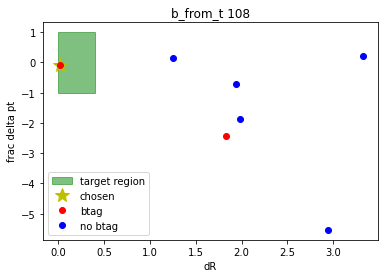

Decay product pt= 59737.475808351526
Jet pts= [3.9e+05, 2.04e+05, 1.72e+05, 1.02e+05, 6.49e+04, 5.16e+04, 4.76e+04]
Decay product phi= -0.6664758116778495
Jet phis= [0.894, -1.96, -2.38, 1.16, -0.682, -1.02, 2.17]
Decay product eta= -2.378575421887203
Jet etas= [0.119, -1.09, -1.38, -1.75, -2.37, -1.18, -0.645]


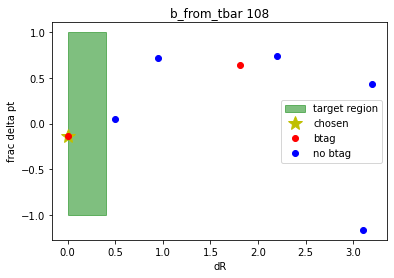

Decay product pt= 180534.7113034221
Jet pts= [3.9e+05, 2.04e+05, 1.72e+05, 1.02e+05, 6.49e+04, 5.16e+04, 4.76e+04]
Decay product phi= -1.9644172266273756
Jet phis= [0.894, -1.96, -2.38, 1.16, -0.682, -1.02, 2.17]
Decay product eta= -1.0917860785516553
Jet etas= [0.119, -1.09, -1.38, -1.75, -2.37, -1.18, -0.645]


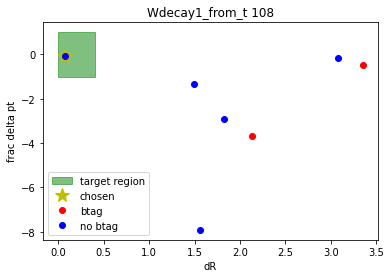

Decay product pt= 43770.34765625
Jet pts= [3.9e+05, 2.04e+05, 1.72e+05, 1.02e+05, 6.49e+04, 5.16e+04, 4.76e+04]
Decay product phi= 2.2202963829040527
Jet phis= [0.894, -1.96, -2.38, 1.16, -0.682, -1.02, 2.17]
Decay product eta= -0.6971715688705444
Jet etas= [0.119, -1.09, -1.38, -1.75, -2.37, -1.18, -0.645]


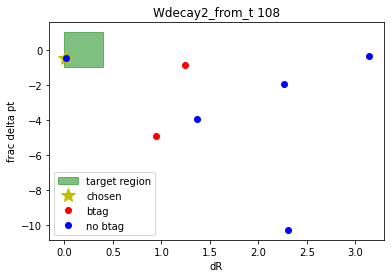

Decay product pt= 34601.85546875
Jet pts= [3.9e+05, 2.04e+05, 1.72e+05, 1.02e+05, 6.49e+04, 5.16e+04, 4.76e+04]
Decay product phi= -1.0248361825942993
Jet phis= [0.894, -1.96, -2.38, 1.16, -0.682, -1.02, 2.17]
Decay product eta= 0.0
Jet etas= [0.119, -1.09, -1.38, -1.75, -2.37, -1.18, -0.645]


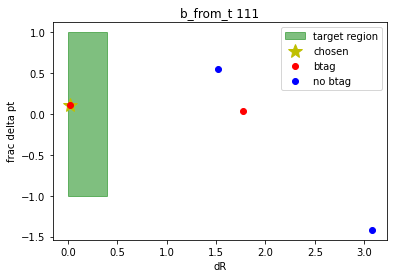

Decay product pt= 105428.32566482347
Jet pts= [2.55e+05, 1.02e+05, 9.4e+04, 4.76e+04]
Decay product phi= -0.28786857102742136
Jet phis= [2.94, -0.527, -0.306, -1.19]
Decay product eta= 0.8080197630301654
Jet etas= [0.378, -0.946, 0.803, -0.414]


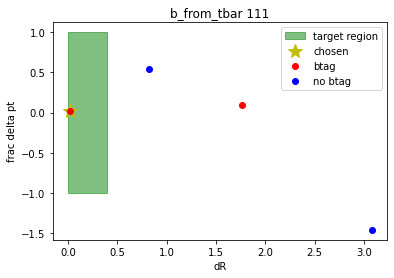

Decay product pt= 103633.96652224429
Jet pts= [2.55e+05, 1.02e+05, 9.4e+04, 4.76e+04]
Decay product phi= -0.5540880216870416
Jet phis= [2.94, -0.527, -0.306, -1.19]
Decay product eta= -0.9418669412299612
Jet etas= [0.378, -0.946, 0.803, -0.414]


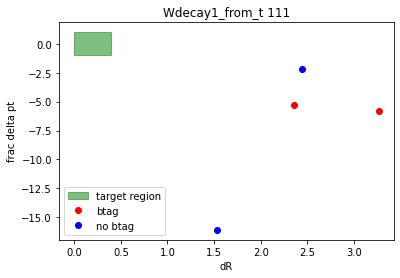

Decay product pt= 14915.7919921875
Jet pts= [2.55e+05, 1.02e+05, 9.4e+04, 4.76e+04]
Decay product phi= -2.498626947402954
Jet phis= [2.94, -0.527, -0.306, -1.19]
Decay product eta= 1.6525354385375977
Jet etas= [0.378, -0.946, 0.803, -0.414]


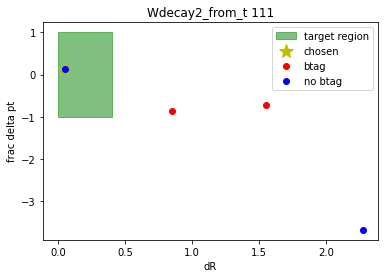

Decay product pt= 54575.19140625
Jet pts= [2.55e+05, 1.02e+05, 9.4e+04, 4.76e+04]
Decay product phi= -1.2219879627227783
Jet phis= [2.94, -0.527, -0.306, -1.19]
Decay product eta= 0.0
Jet etas= [0.378, -0.946, 0.803, -0.414]


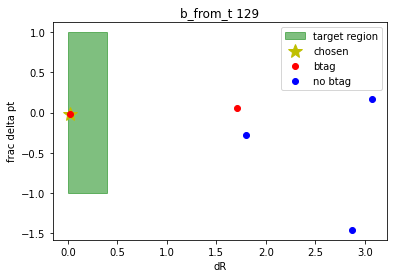

Decay product pt= 55333.192070155
Jet pts= [1.36e+05, 7.05e+04, 5.6e+04, 5.21e+04, 4.58e+04]
Decay product phi= -2.936649070301497
Jet phis= [-2.62, 1.64, -2.93, -1.23, -1.8]
Decay product eta= 1.1228338334116108
Jet etas= [-1.73, 1.68, 1.14, 0.97, -1.73]


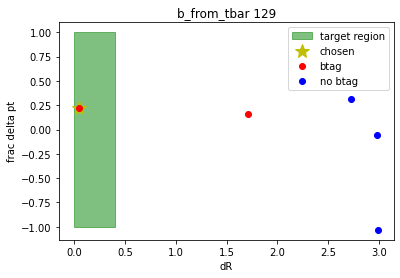

Decay product pt= 66994.64065346951
Jet pts= [1.36e+05, 7.05e+04, 5.6e+04, 5.21e+04, 4.58e+04]
Decay product phi= -1.2400072967220037
Jet phis= [-2.62, 1.64, -2.93, -1.23, -1.8]
Decay product eta= 0.9272498368015306
Jet etas= [-1.73, 1.68, 1.14, 0.97, -1.73]


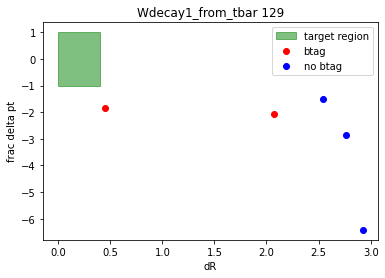

Decay product pt= 18353.583984375
Jet pts= [1.36e+05, 7.05e+04, 5.6e+04, 5.21e+04, 4.58e+04]
Decay product phi= -0.917773962020874
Jet phis= [-2.62, 1.64, -2.93, -1.23, -1.8]
Decay product eta= 0.6475818157196045
Jet etas= [-1.73, 1.68, 1.14, 0.97, -1.73]


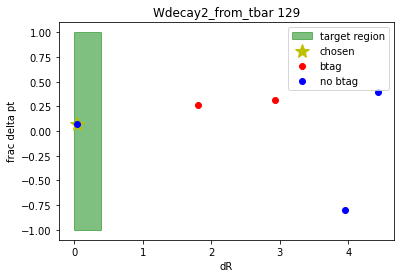

Decay product pt= 75714.640625
Jet pts= [1.36e+05, 7.05e+04, 5.6e+04, 5.21e+04, 4.58e+04]
Decay product phi= 1.6115144491195679
Jet phis= [-2.62, 1.64, -2.93, -1.23, -1.8]
Decay product eta= 1.647007942199707
Jet etas= [-1.73, 1.68, 1.14, 0.97, -1.73]


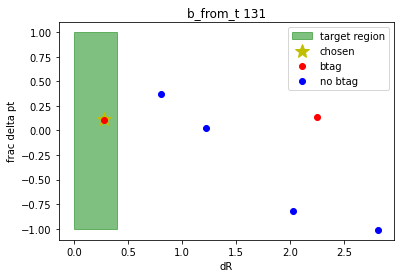

Decay product pt= 45195.04406692262
Jet pts= [9.09e+04, 8.21e+04, 4.41e+04, 4.01e+04, 3.88e+04, 2.82e+04]
Decay product phi= -2.3695534424624736
Jet phis= [0.311, -0.499, 2.86, -2.64, -0.888, 3.11]
Decay product eta= 0.8633717015543825
Jet etas= [-0.00647, 0.0817, 0.258, 0.872, -0.824, 0.808]


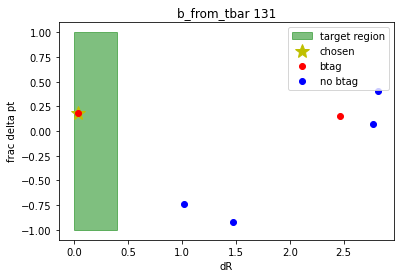

Decay product pt= 47371.87038764784
Jet pts= [9.09e+04, 8.21e+04, 4.41e+04, 4.01e+04, 3.88e+04, 2.82e+04]
Decay product phi= -0.8899112109618734
Jet phis= [0.311, -0.499, 2.86, -2.64, -0.888, 3.11]
Decay product eta= -0.85824805011301
Jet etas= [-0.00647, 0.0817, 0.258, 0.872, -0.824, 0.808]


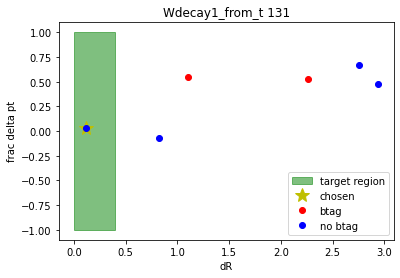

Decay product pt= 84996.5078125
Jet pts= [9.09e+04, 8.21e+04, 4.41e+04, 4.01e+04, 3.88e+04, 2.82e+04]
Decay product phi= -0.485945463180542
Jet phis= [0.311, -0.499, 2.86, -2.64, -0.888, 3.11]
Decay product eta= 0.19705484807491302
Jet etas= [-0.00647, 0.0817, 0.258, 0.872, -0.824, 0.808]


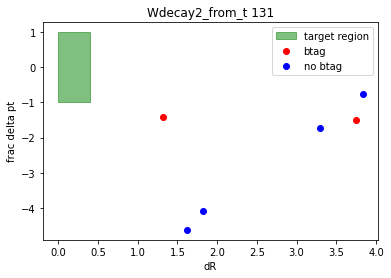

Decay product pt= 16155.7646484375
Jet pts= [9.09e+04, 8.21e+04, 4.41e+04, 4.01e+04, 3.88e+04, 2.82e+04]
Decay product phi= 0.15527404844760895
Jet phis= [0.311, -0.499, 2.86, -2.64, -0.888, 3.11]
Decay product eta= 0.0
Jet etas= [-0.00647, 0.0817, 0.258, 0.872, -0.824, 0.808]


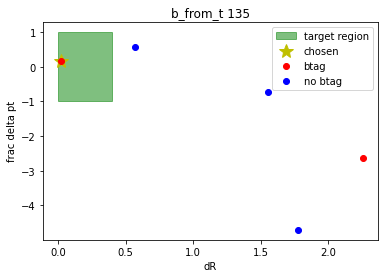

Decay product pt= 78709.5177098999
Jet pts= [4.49e+05, 2.87e+05, 1.37e+05, 6.51e+04, 3.38e+04]
Decay product phi= 2.109594730876913
Jet phis= [-2.4, 0.113, 1.46, 2.1, 1.82]
Decay product eta= 1.554300941589416
Jet etas= [1.52, 0.51, 0.139, 1.53, 1.07]


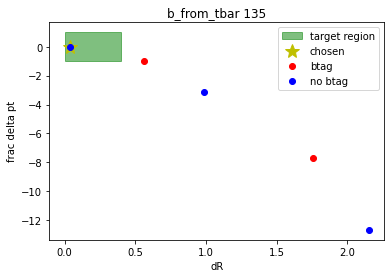

Decay product pt= 32866.112905110575
Jet pts= [4.49e+05, 2.87e+05, 1.37e+05, 6.51e+04, 3.38e+04]
Decay product phi= 1.7761231261795354
Jet phis= [-2.4, 0.113, 1.46, 2.1, 1.82]
Decay product eta= 1.0741072679181913
Jet etas= [1.52, 0.51, 0.139, 1.53, 1.07]


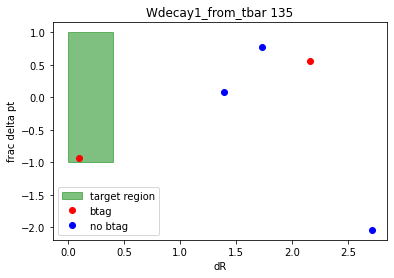

Decay product pt= 147891.046875
Jet pts= [4.49e+05, 2.87e+05, 1.37e+05, 6.51e+04, 3.38e+04]
Decay product phi= 0.15175050497055054
Jet phis= [-2.4, 0.113, 1.46, 2.1, 1.82]
Decay product eta= 0.6033284664154053
Jet etas= [1.52, 0.51, 0.139, 1.53, 1.07]


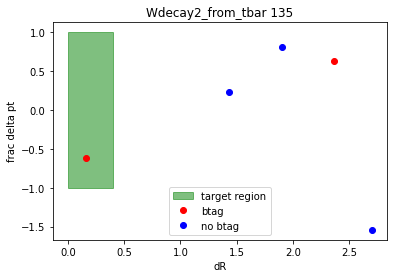

Decay product pt= 176730.125
Jet pts= [4.49e+05, 2.87e+05, 1.37e+05, 6.51e+04, 3.38e+04]
Decay product phi= 0.045396216213703156
Jet phis= [-2.4, 0.113, 1.46, 2.1, 1.82]
Decay product eta= 0.3674177825450897
Jet etas= [1.52, 0.51, 0.139, 1.53, 1.07]


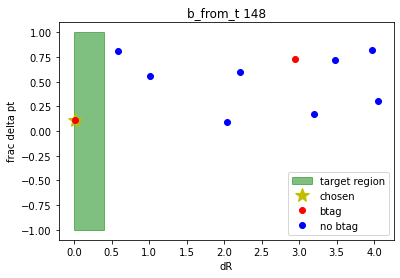

Decay product pt= 142497.16387502511
Jet pts= [1.29e+05, 1.26e+05, 1.18e+05, 9.87e+04, ... 4.01e+04, 3.92e+04, 2.73e+04, 2.52e+04]
Decay product phi= -1.2569466757903829
Jet phis= [3.09, -1.27, 0.641, 1.16, -2.2, -2.96, 1.34, 1.6, -1.43, 1.75]
Decay product eta= 1.2551116789936663
Jet etas= [1.91, 1.26, -1.32, -2.01, 0.889, -0.154, -1.05, 0.515, 0.698, -1.34]


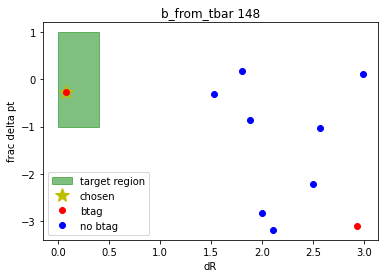

Decay product pt= 30740.4125212676
Jet pts= [1.29e+05, 1.26e+05, 1.18e+05, 9.87e+04, ... 4.01e+04, 3.92e+04, 2.73e+04, 2.52e+04]
Decay product phi= 1.5470075918075157
Jet phis= [3.09, -1.27, 0.641, 1.16, -2.2, -2.96, 1.34, 1.6, -1.43, 1.75]
Decay product eta= 0.46128538573463146
Jet etas= [1.91, 1.26, -1.32, -2.01, 0.889, -0.154, -1.05, 0.515, 0.698, -1.34]


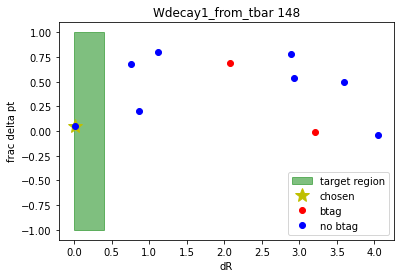

Decay product pt= 124439.1875
Jet pts= [1.29e+05, 1.26e+05, 1.18e+05, 9.87e+04, ... 4.01e+04, 3.92e+04, 2.73e+04, 2.52e+04]
Decay product phi= 0.6322512626647949
Jet phis= [3.09, -1.27, 0.641, 1.16, -2.2, -2.96, 1.34, 1.6, -1.43, 1.75]
Decay product eta= -1.3189220428466797
Jet etas= [1.91, 1.26, -1.32, -2.01, 0.889, -0.154, -1.05, 0.515, 0.698, -1.34]


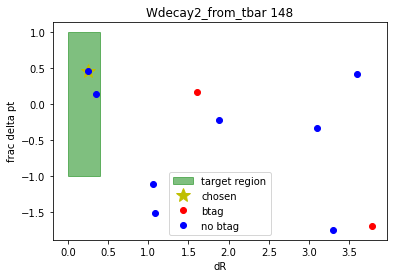

Decay product pt= 46850.109375
Jet pts= [1.29e+05, 1.26e+05, 1.18e+05, 9.87e+04, ... 4.01e+04, 3.92e+04, 2.73e+04, 2.52e+04]
Decay product phi= 1.695091724395752
Jet phis= [3.09, -1.27, 0.641, 1.16, -2.2, -2.96, 1.34, 1.6, -1.43, 1.75]
Decay product eta= -1.086135983467102
Jet etas= [1.91, 1.26, -1.32, -2.01, 0.889, -0.154, -1.05, 0.515, 0.698, -1.34]


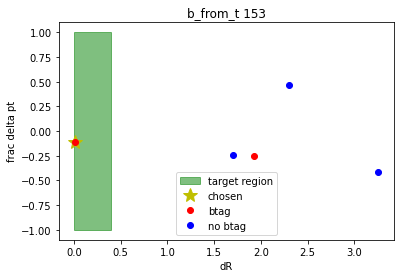

Decay product pt= 65367.681508498215
Jet pts= [9.27e+04, 8.2e+04, 8.15e+04, 7.29e+04, 3.52e+04]
Decay product phi= -0.7655602034607707
Jet phis= [2.41, -2.68, -2.12, -0.766, 0.98]
Decay product eta= 0.10248650453706608
Jet etas= [-0.871, 0.285, -0.92, 0.0976, 1.6]


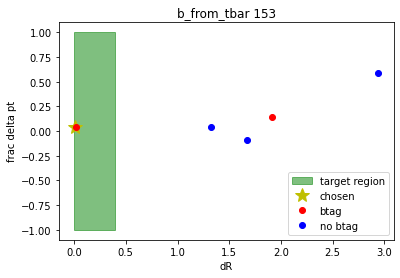

Decay product pt= 85303.03497338269
Jet pts= [9.27e+04, 8.2e+04, 8.15e+04, 7.29e+04, 3.52e+04]
Decay product phi= -2.6707398887948637
Jet phis= [2.41, -2.68, -2.12, -0.766, 0.98]
Decay product eta= 0.2865904523810859
Jet etas= [-0.871, 0.285, -0.92, 0.0976, 1.6]


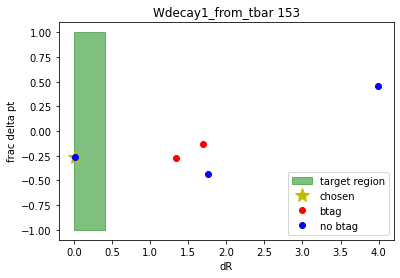

Decay product pt= 64534.42578125
Jet pts= [9.27e+04, 8.2e+04, 8.15e+04, 7.29e+04, 3.52e+04]
Decay product phi= -2.1193346977233887
Jet phis= [2.41, -2.68, -2.12, -0.766, 0.98]
Decay product eta= -0.9259428381919861
Jet etas= [-0.871, 0.285, -0.92, 0.0976, 1.6]


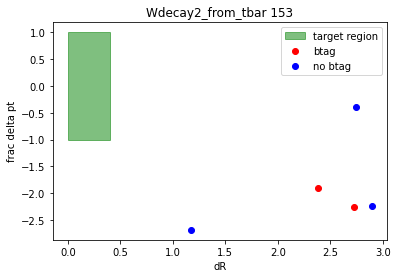

Decay product pt= 25185.447265625
Jet pts= [9.27e+04, 8.2e+04, 8.15e+04, 7.29e+04, 3.52e+04]
Decay product phi= 1.26893150806427
Jet phis= [2.41, -2.68, -2.12, -0.766, 0.98]
Decay product eta= -1.1359074115753174
Jet etas= [-0.871, 0.285, -0.92, 0.0976, 1.6]


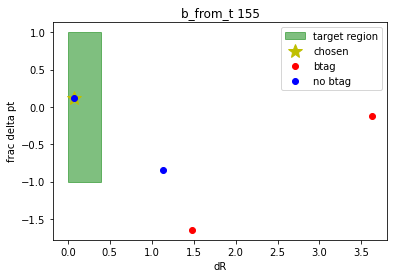

Decay product pt= 36293.655179850866
Jet pts= [9.61e+04, 6.68e+04, 4.09e+04, 3.18e+04]
Decay product phi= -0.3260052793158632
Jet phis= [-1.1, -1.38, 2.77, -0.254]
Decay product eta= -0.3654645162268354
Jet etas= [0.896, 0.0647, 1.53, -0.343]


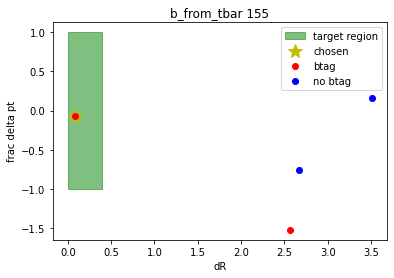

Decay product pt= 38093.694973508886
Jet pts= [9.61e+04, 6.68e+04, 4.09e+04, 3.18e+04]
Decay product phi= 2.6972534066607006
Jet phis= [-1.1, -1.38, 2.77, -0.254]
Decay product eta= 1.561768028262288
Jet etas= [0.896, 0.0647, 1.53, -0.343]


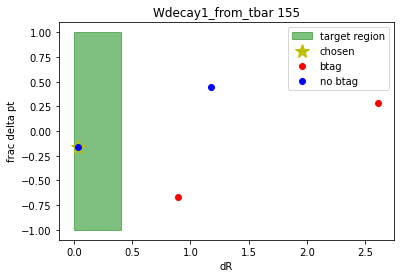

Decay product pt= 57501.85546875
Jet pts= [9.61e+04, 6.68e+04, 4.09e+04, 3.18e+04]
Decay product phi= -1.3652595281600952
Jet phis= [-1.1, -1.38, 2.77, -0.254]
Decay product eta= 0.03779824078083038
Jet etas= [0.896, 0.0647, 1.53, -0.343]


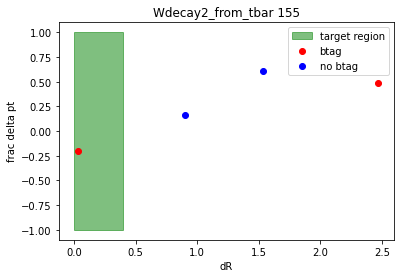

Decay product pt= 80050.34375
Jet pts= [9.61e+04, 6.68e+04, 4.09e+04, 3.18e+04]
Decay product phi= -1.116736888885498
Jet phis= [-1.1, -1.38, 2.77, -0.254]
Decay product eta= 0.926926851272583
Jet etas= [0.896, 0.0647, 1.53, -0.343]


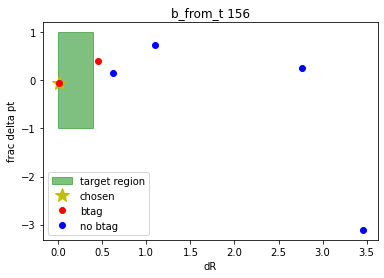

Decay product pt= 123909.12475747301
Jet pts= [5.09e+05, 1.31e+05, 1.04e+05, 9.28e+04, 7.42e+04, 3.29e+04]
Decay product phi= 1.9536717032545363
Jet phis= [-1.02, 1.96, 2.01, 2.2, 1.64, 3.01]
Decay product eta= 0.87743549038869
Jet etas= [-0.873, 0.886, 1.5, -1.88, 0.551, 1.16]


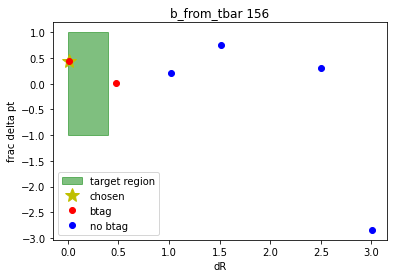

Decay product pt= 132510.61530658015
Jet pts= [5.09e+05, 1.31e+05, 1.04e+05, 9.28e+04, 7.42e+04, 3.29e+04]
Decay product phi= 1.624756492087787
Jet phis= [-1.02, 1.96, 2.01, 2.2, 1.64, 3.01]
Decay product eta= 0.5526602310869851
Jet etas= [-0.873, 0.886, 1.5, -1.88, 0.551, 1.16]


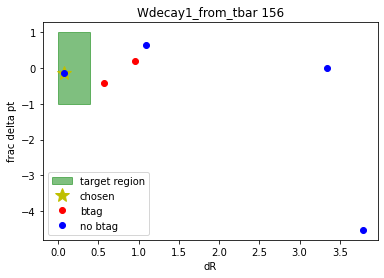

Decay product pt= 92149.078125
Jet pts= [5.09e+05, 1.31e+05, 1.04e+05, 9.28e+04, 7.42e+04, 3.29e+04]
Decay product phi= 1.9575293064117432
Jet phis= [-1.02, 1.96, 2.01, 2.2, 1.64, 3.01]
Decay product eta= 1.4554851055145264
Jet etas= [-0.873, 0.886, 1.5, -1.88, 0.551, 1.16]


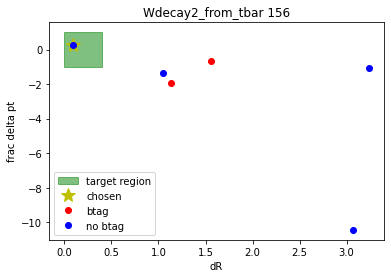

Decay product pt= 44516.984375
Jet pts= [5.09e+05, 1.31e+05, 1.04e+05, 9.28e+04, 7.42e+04, 3.29e+04]
Decay product phi= 3.0371792316436768
Jet phis= [-1.02, 1.96, 2.01, 2.2, 1.64, 3.01]
Decay product eta= 1.2495203018188477
Jet etas= [-0.873, 0.886, 1.5, -1.88, 0.551, 1.16]


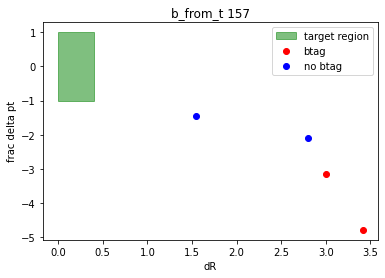

Decay product pt= 11298.295723503647
Jet pts= [6.53e+04, 4.69e+04, 3.5e+04, 2.78e+04]
Decay product phi= 0.7963129956522939
Jet phis= [-2.22, -2.57, -0.933, -0.409]
Decay product eta= 2.428240313939437
Jet etas= [0.833, 1.73, 0.226, 1.46]


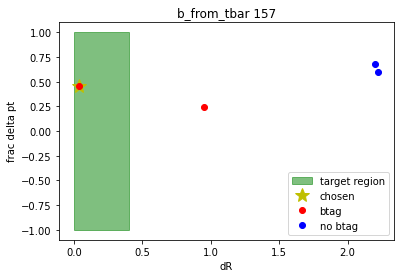

Decay product pt= 86531.24068805478
Jet pts= [6.53e+04, 4.69e+04, 3.5e+04, 2.78e+04]
Decay product phi= -2.5971281665448047
Jet phis= [-2.22, -2.57, -0.933, -0.409]
Decay product eta= 1.704439931294333
Jet etas= [0.833, 1.73, 0.226, 1.46]


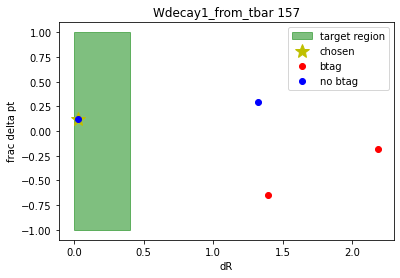

Decay product pt= 39645.76171875
Jet pts= [6.53e+04, 4.69e+04, 3.5e+04, 2.78e+04]
Decay product phi= -0.9488769173622131
Jet phis= [-2.22, -2.57, -0.933, -0.409]
Decay product eta= 0.2512434422969818
Jet etas= [0.833, 1.73, 0.226, 1.46]


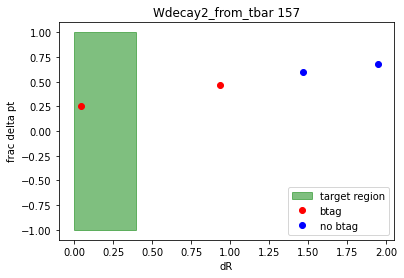

Decay product pt= 87943.28125
Jet pts= [6.53e+04, 4.69e+04, 3.5e+04, 2.78e+04]
Decay product phi= -2.260831356048584
Jet phis= [-2.22, -2.57, -0.933, -0.409]
Decay product eta= 0.8447479605674744
Jet etas= [0.833, 1.73, 0.226, 1.46]


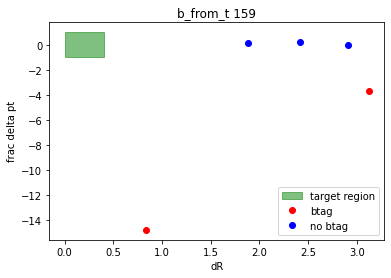

Decay product pt= 36341.79793796348
Jet pts= [5.74e+05, 1.71e+05, 3.72e+04, 3.24e+04, 2.7e+04]
Decay product phi= 1.3779790233268656
Jet phis= [1.56, -1.71, -2.46, -0.501, -0.97]
Decay product eta= -0.5089702233526928
Jet etas= [0.303, -0.0466, -2.08, -0.64, -1.09]


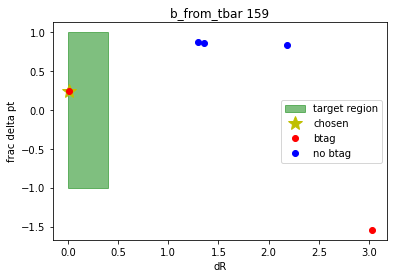

Decay product pt= 225457.28406793188
Jet pts= [5.74e+05, 1.71e+05, 3.72e+04, 3.24e+04, 2.7e+04]
Decay product phi= -1.7142202522055392
Jet phis= [1.56, -1.71, -2.46, -0.501, -0.97]
Decay product eta= -0.03205272896381468
Jet etas= [0.303, -0.0466, -2.08, -0.64, -1.09]


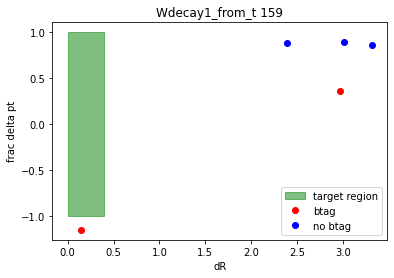

Decay product pt= 267171.5
Jet pts= [5.74e+05, 1.71e+05, 3.72e+04, 3.24e+04, 2.7e+04]
Decay product phi= 1.6438332796096802
Jet phis= [1.56, -1.71, -2.46, -0.501, -0.97]
Decay product eta= 0.4133840501308441
Jet etas= [0.303, -0.0466, -2.08, -0.64, -1.09]


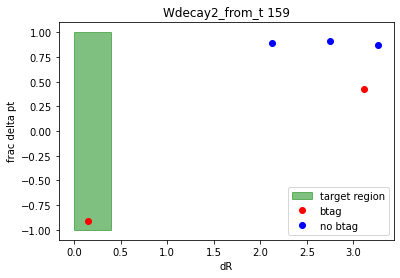

Decay product pt= 300091.6875
Jet pts= [5.74e+05, 1.71e+05, 3.72e+04, 3.24e+04, 2.7e+04]
Decay product phi= 1.4663279056549072
Jet phis= [1.56, -1.71, -2.46, -0.501, -0.97]
Decay product eta= 0.0
Jet etas= [0.303, -0.0466, -2.08, -0.64, -1.09]


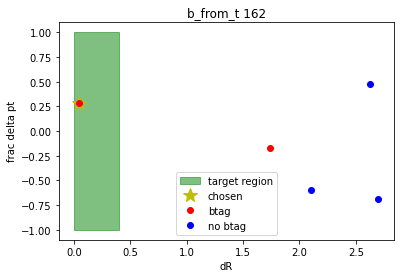

Decay product pt= 55936.62694652516
Jet pts= [9.41e+04, 8.94e+04, 6.55e+04, 4e+04, 2.91e+04]
Decay product phi= 2.9469221677980553
Jet phis= [0.457, -1.24, 1.23, 2.96, 0.339]
Decay product eta= 1.6317449478585715
Jet etas= [0.586, 1.43, 1.31, 1.59, 1.93]


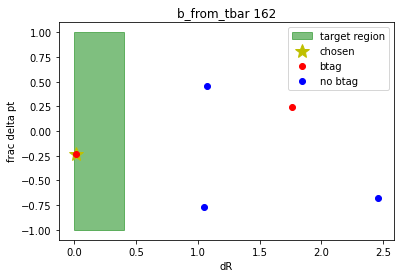

Decay product pt= 53258.73545367033
Jet pts= [9.41e+04, 8.94e+04, 6.55e+04, 4e+04, 2.91e+04]
Decay product phi= 1.2178384342140545
Jet phis= [0.457, -1.24, 1.23, 2.96, 0.339]
Decay product eta= 1.3123960724618826
Jet etas= [0.586, 1.43, 1.31, 1.59, 1.93]


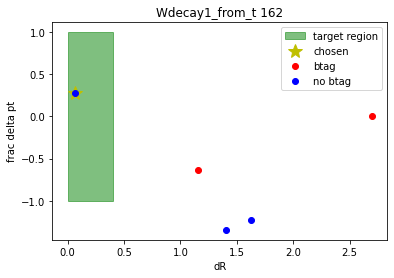

Decay product pt= 40102.50390625
Jet pts= [9.41e+04, 8.94e+04, 6.55e+04, 4e+04, 2.91e+04]
Decay product phi= 0.2904282212257385
Jet phis= [0.457, -1.24, 1.23, 2.96, 0.339]
Decay product eta= 1.980717420578003
Jet etas= [0.586, 1.43, 1.31, 1.59, 1.93]


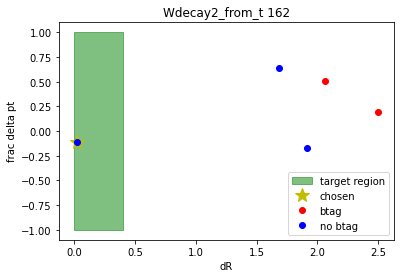

Decay product pt= 80688.7265625
Jet pts= [9.41e+04, 8.94e+04, 6.55e+04, 4e+04, 2.91e+04]
Decay product phi= -1.2653138637542725
Jet phis= [0.457, -1.24, 1.23, 2.96, 0.339]
Decay product eta= 0.0
Jet etas= [0.586, 1.43, 1.31, 1.59, 1.93]


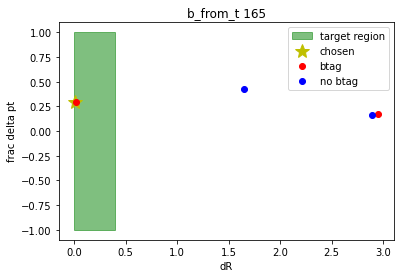

Decay product pt= 64533.982750587784
Jet pts= [5.38e+04, 5.32e+04, 4.57e+04, 3.69e+04]
Decay product phi= -1.4071054279225836
Jet phis= [1.44, 2.02, -1.41, 0.233]
Decay product eta= 1.8844391509355507
Jet etas= [1.42, 1.14, 1.9, 2.04]


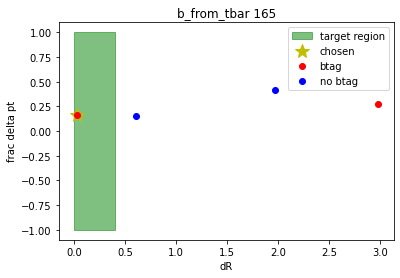

Decay product pt= 63381.2282120001
Jet pts= [5.38e+04, 5.32e+04, 4.57e+04, 3.69e+04]
Decay product phi= 1.990017894506428
Jet phis= [1.44, 2.02, -1.41, 0.233]
Decay product eta= 1.152890383130957
Jet etas= [1.42, 1.14, 1.9, 2.04]


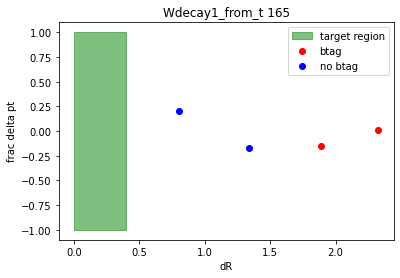

Decay product pt= 46127.86328125
Jet pts= [5.38e+04, 5.32e+04, 4.57e+04, 3.69e+04]
Decay product phi= 0.812722384929657
Jet phis= [1.44, 2.02, -1.41, 0.233]
Decay product eta= 2.5991549491882324
Jet etas= [1.42, 1.14, 1.9, 2.04]


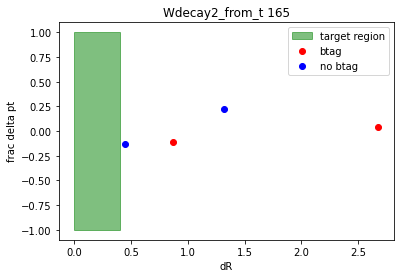

Decay product pt= 47828.53515625
Jet pts= [5.38e+04, 5.32e+04, 4.57e+04, 3.69e+04]
Decay product phi= 1.1443984508514404
Jet phis= [1.44, 2.02, -1.41, 0.233]
Decay product eta= 0.0
Jet etas= [1.42, 1.14, 1.9, 2.04]


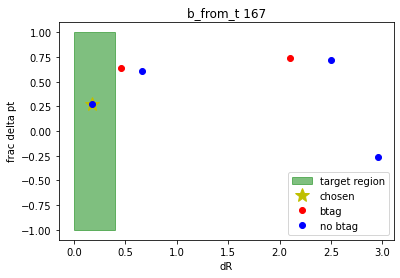

Decay product pt= 115347.05699024163
Jet pts= [1.45e+05, 8.4e+04, 4.51e+04, 4.14e+04, 3.21e+04, 3e+04]
Decay product phi= 1.3479352108904958
Jet phis= [-2.09, 1.28, 1.58, 1.5, -0.994, 0.258]
Decay product eta= -0.7549104086556223
Jet etas= [-1.58, -0.917, -1.38, -0.323, -1.64, 1.04]


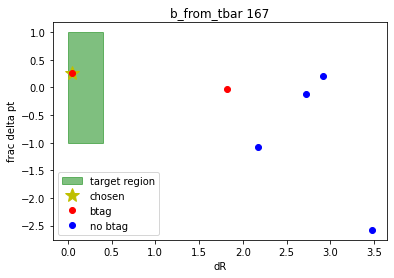

Decay product pt= 40623.40582022376
Jet pts= [1.45e+05, 8.4e+04, 4.51e+04, 4.14e+04, 3.21e+04, 3e+04]
Decay product phi= 0.24929307370223297
Jet phis= [-2.09, 1.28, 1.58, 1.5, -0.994, 0.258]
Decay product eta= 0.9963357877288685
Jet etas= [-1.58, -0.917, -1.38, -0.323, -1.64, 1.04]


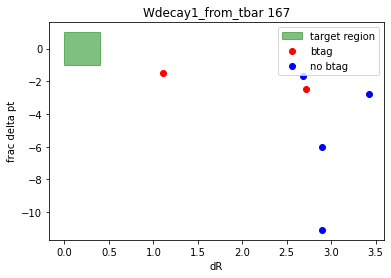

Decay product pt= 12031.2294921875
Jet pts= [1.45e+05, 8.4e+04, 4.51e+04, 4.14e+04, 3.21e+04, 3e+04]
Decay product phi= -0.8497335910797119
Jet phis= [-2.09, 1.28, 1.58, 1.5, -0.994, 0.258]
Decay product eta= 1.037964105606079
Jet etas= [-1.58, -0.917, -1.38, -0.323, -1.64, 1.04]


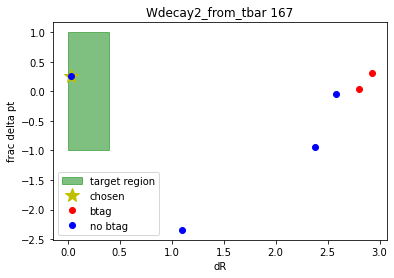

Decay product pt= 43473.30078125
Jet pts= [1.45e+05, 8.4e+04, 4.51e+04, 4.14e+04, 3.21e+04, 3e+04]
Decay product phi= -0.9914615750312805
Jet phis= [-2.09, 1.28, 1.58, 1.5, -0.994, 0.258]
Decay product eta= -1.604075312614441
Jet etas= [-1.58, -0.917, -1.38, -0.323, -1.64, 1.04]


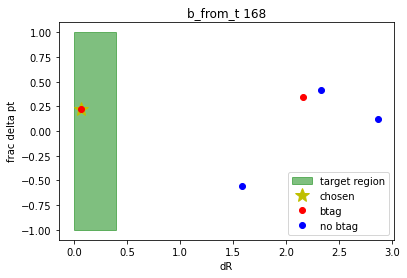

Decay product pt= 50964.87157629667
Jet pts= [7.91e+04, 4.5e+04, 3.95e+04, 3.34e+04, 2.99e+04]
Decay product phi= -2.339719773842049
Jet phis= [-1.35, 1.16, -2.4, 2.54, 1.92]
Decay product eta= -0.7962440173347213
Jet etas= [0.434, -1.49, -0.77, -2.44, 0.354]


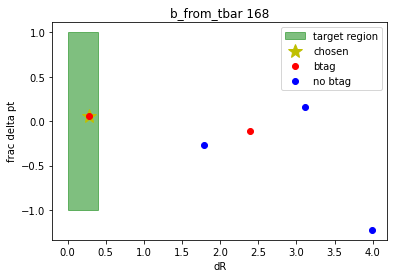

Decay product pt= 35547.498167571
Jet pts= [7.91e+04, 4.5e+04, 3.95e+04, 3.34e+04, 2.99e+04]
Decay product phi= 2.473620117106673
Jet phis= [-1.35, 1.16, -2.4, 2.54, 1.92]
Decay product eta= -2.7073077142479915
Jet etas= [0.434, -1.49, -0.77, -2.44, 0.354]


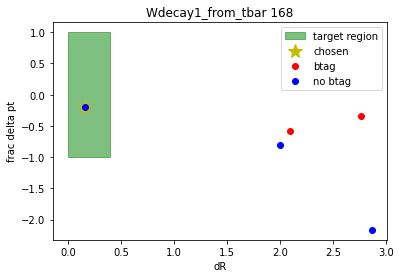

Decay product pt= 24966.640625
Jet pts= [7.91e+04, 4.5e+04, 3.95e+04, 3.34e+04, 2.99e+04]
Decay product phi= 2.0699329376220703
Jet phis= [-1.35, 1.16, -2.4, 2.54, 1.92]
Decay product eta= 0.2916986048221588
Jet etas= [0.434, -1.49, -0.77, -2.44, 0.354]


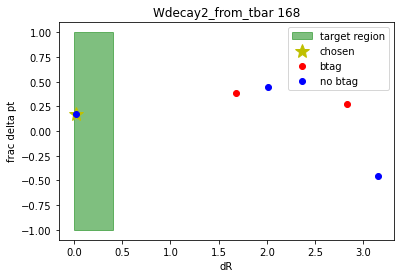

Decay product pt= 54346.14453125
Jet pts= [7.91e+04, 4.5e+04, 3.95e+04, 3.34e+04, 2.99e+04]
Decay product phi= 1.1467821598052979
Jet phis= [-1.35, 1.16, -2.4, 2.54, 1.92]
Decay product eta= -1.503374457359314
Jet etas= [0.434, -1.49, -0.77, -2.44, 0.354]


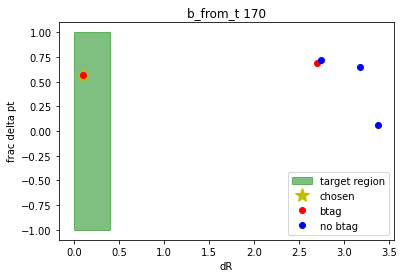

Decay product pt= 213617.4957742818
Jet pts= [2e+05, 9.32e+04, 7.59e+04, 6.58e+04, 6.03e+04]
Decay product phi= 1.3838389414670802
Jet phis= [-1.78, 1.39, -3.14, -1.17, -0.815]
Decay product eta= -0.8264506049591005
Jet etas= [-2.15, -0.921, 1.82, 0.0496, 0.819]


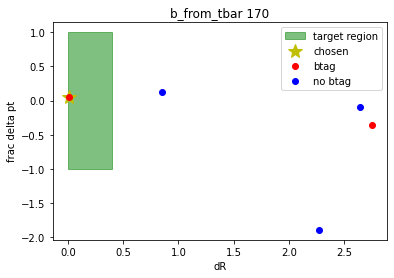

Decay product pt= 68981.95166751934
Jet pts= [2e+05, 9.32e+04, 7.59e+04, 6.58e+04, 6.03e+04]
Decay product phi= -1.1837008119512127
Jet phis= [-1.78, 1.39, -3.14, -1.17, -0.815]
Decay product eta= 0.048601791654379
Jet etas= [-2.15, -0.921, 1.82, 0.0496, 0.819]


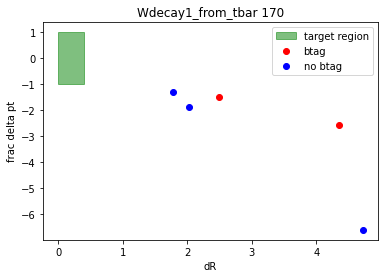

Decay product pt= 26212.537109375
Jet pts= [2e+05, 9.32e+04, 7.59e+04, 6.58e+04, 6.03e+04]
Decay product phi= -1.2412102222442627
Jet phis= [-1.78, 1.39, -3.14, -1.17, -0.815]
Decay product eta= 2.538292169570923
Jet etas= [-2.15, -0.921, 1.82, 0.0496, 0.819]


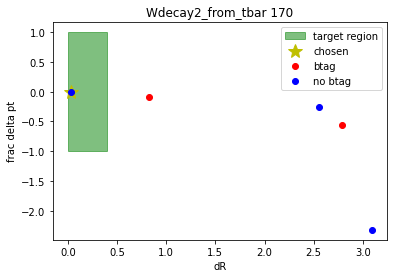

Decay product pt= 60035.68359375
Jet pts= [2e+05, 9.32e+04, 7.59e+04, 6.58e+04, 6.03e+04]
Decay product phi= -0.8042246699333191
Jet phis= [-1.78, 1.39, -3.14, -1.17, -0.815]
Decay product eta= 0.7898873686790466
Jet etas= [-2.15, -0.921, 1.82, 0.0496, 0.819]


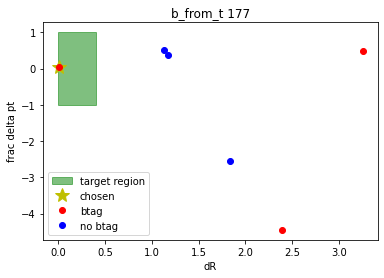

Decay product pt= 89534.48213158065
Jet pts= [4.88e+05, 3.19e+05, 8.58e+04, 5.56e+04, 4.73e+04, 4.35e+04]
Decay product phi= 0.033843775512372165
Jet phis= [-2.31, 1.78, 0.0405, -0.948, -3.13, -0.672]
Decay product eta= -0.6938050959266888
Jet etas= [-0.189, -0.14, -0.693, -1.33, 0.227, 0.195]


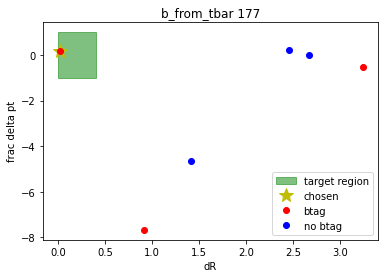

Decay product pt= 56230.56072747897
Jet pts= [4.88e+05, 3.19e+05, 8.58e+04, 5.56e+04, 4.73e+04, 4.35e+04]
Decay product phi= -3.131546929041715
Jet phis= [-2.31, 1.78, 0.0405, -0.948, -3.13, -0.672]
Decay product eta= 0.211172324787631
Jet etas= [-0.189, -0.14, -0.693, -1.33, 0.227, 0.195]


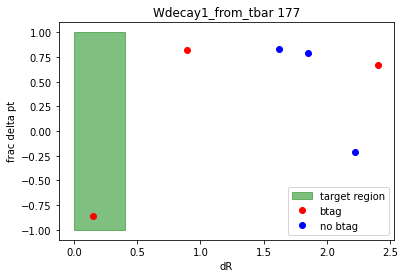

Decay product pt= 262086.828125
Jet pts= [4.88e+05, 3.19e+05, 8.58e+04, 5.56e+04, 4.73e+04, 4.35e+04]
Decay product phi= -2.2786448001861572
Jet phis= [-2.31, 1.78, 0.0405, -0.948, -3.13, -0.672]
Decay product eta= -0.0457584448158741
Jet etas= [-0.189, -0.14, -0.693, -1.33, 0.227, 0.195]


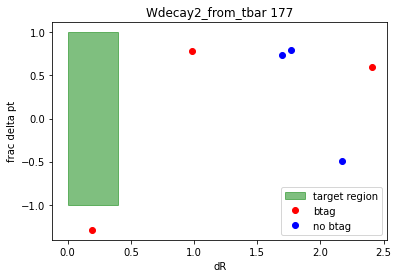

Decay product pt= 212985.21875
Jet pts= [4.88e+05, 3.19e+05, 8.58e+04, 5.56e+04, 4.73e+04, 4.35e+04]
Decay product phi= -2.3464462757110596
Jet phis= [-2.31, 1.78, 0.0405, -0.948, -3.13, -0.672]
Decay product eta= -0.3745599389076233
Jet etas= [-0.189, -0.14, -0.693, -1.33, 0.227, 0.195]


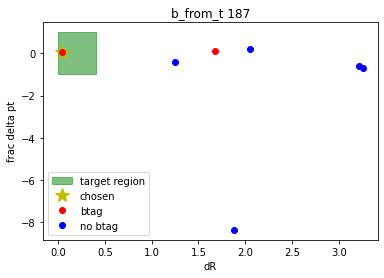

Decay product pt= 65718.92644170919
Jet pts= [6.16e+05, 1.13e+05, 1.05e+05, 9.31e+04, 6e+04, 5.79e+04, 5.37e+04]
Decay product phi= -1.811861447791809
Jet phis= [-0.237, 1.89, 2.5, -3.03, -1.82, -2.04, 2.42]
Decay product eta= 0.6496883905206253
Jet etas= [-0.378, -1.33, -1.89, 0.921, 0.686, -1.01, 0.564]


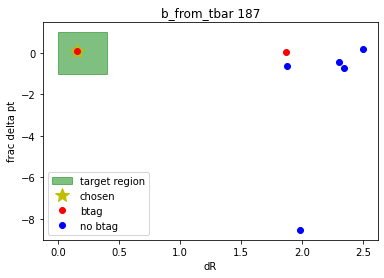

Decay product pt= 64631.2638993066
Jet pts= [6.16e+05, 1.13e+05, 1.05e+05, 9.31e+04, 6e+04, 5.79e+04, 5.37e+04]
Decay product phi= -2.058007615480232
Jet phis= [-0.237, 1.89, 2.5, -3.03, -1.82, -2.04, 2.42]
Decay product eta= -1.1626440881613738
Jet etas= [-0.378, -1.33, -1.89, 0.921, 0.686, -1.01, 0.564]


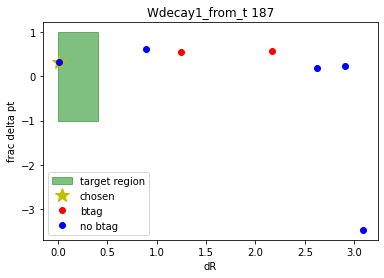

Decay product pt= 137631.953125
Jet pts= [6.16e+05, 1.13e+05, 1.05e+05, 9.31e+04, 6e+04, 5.79e+04, 5.37e+04]
Decay product phi= -3.0393166542053223
Jet phis= [-0.237, 1.89, 2.5, -3.03, -1.82, -2.04, 2.42]
Decay product eta= 0.9138906598091125
Jet etas= [-0.378, -1.33, -1.89, 0.921, 0.686, -1.01, 0.564]


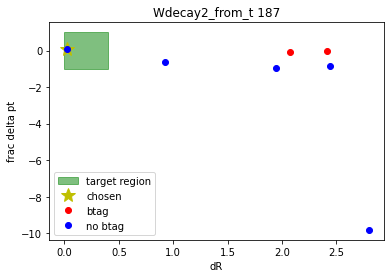

Decay product pt= 56923.26953125
Jet pts= [6.16e+05, 1.13e+05, 1.05e+05, 9.31e+04, 6e+04, 5.79e+04, 5.37e+04]
Decay product phi= 2.4019899368286133
Jet phis= [-0.237, 1.89, 2.5, -3.03, -1.82, -2.04, 2.42]
Decay product eta= 0.0
Jet etas= [-0.378, -1.33, -1.89, 0.921, 0.686, -1.01, 0.564]


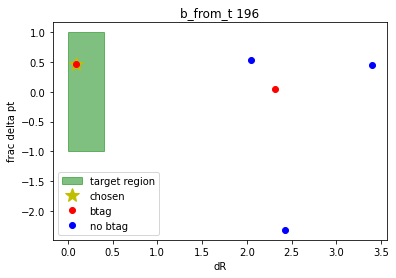

Decay product pt= 66292.7499904551
Jet pts= [2.2e+05, 6.32e+04, 3.61e+04, 3.53e+04, 3.12e+04]
Decay product phi= 2.727062635354425
Jet phis= [0.359, 2.11, -0.396, 2.75, -3.11]
Decay product eta= -1.1350635702738097
Jet etas= [-0.597, 1.1, 0.213, -1.23, 0.864]


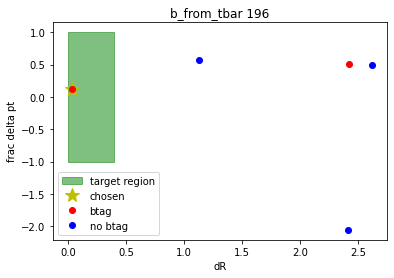

Decay product pt= 71922.30189298886
Jet pts= [2.2e+05, 6.32e+04, 3.61e+04, 3.53e+04, 3.12e+04]
Decay product phi= 2.0701681234627527
Jet phis= [0.359, 2.11, -0.396, 2.75, -3.11]
Decay product eta= 1.0960912817123294
Jet etas= [-0.597, 1.1, 0.213, -1.23, 0.864]


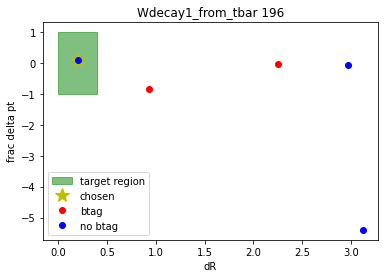

Decay product pt= 34350.578125
Jet pts= [2.2e+05, 6.32e+04, 3.61e+04, 3.53e+04, 3.12e+04]
Decay product phi= 3.0312561988830566
Jet phis= [0.359, 2.11, -0.396, 2.75, -3.11]
Decay product eta= 1.0075204372406006
Jet etas= [-0.597, 1.1, 0.213, -1.23, 0.864]


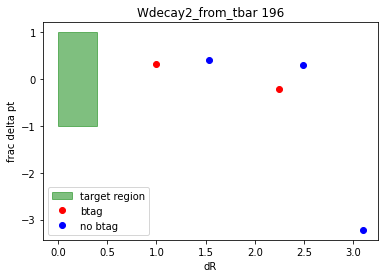

Decay product pt= 52105.02734375
Jet pts= [2.2e+05, 6.32e+04, 3.61e+04, 3.53e+04, 3.12e+04]
Decay product phi= -2.7387688159942627
Jet phis= [0.359, 2.11, -0.396, 2.75, -3.11]
Decay product eta= -0.6261124014854431
Jet etas= [-0.597, 1.1, 0.213, -1.23, 0.864]


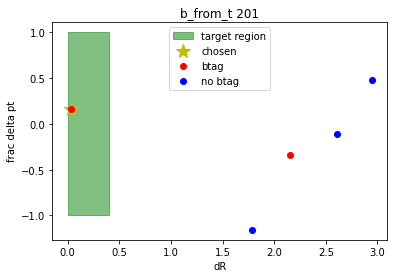

Decay product pt= 58936.38441778473
Jet pts= [1.27e+05, 7.9e+04, 6.55e+04, 4.96e+04, 3.09e+04]
Decay product phi= -0.7888185780694728
Jet phis= [-0.928, 1.33, 2.89, -0.801, 1.49]
Decay product eta= -0.7338957487098418
Jet etas= [1.04, -1.13, -0.779, -0.703, 1.13]


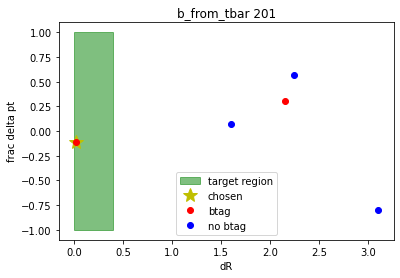

Decay product pt= 70882.74555743819
Jet pts= [1.27e+05, 7.9e+04, 6.55e+04, 4.96e+04, 3.09e+04]
Decay product phi= 1.3197226896272687
Jet phis= [-0.928, 1.33, 2.89, -0.801, 1.49]
Decay product eta= -1.1040891215141202
Jet etas= [1.04, -1.13, -0.779, -0.703, 1.13]


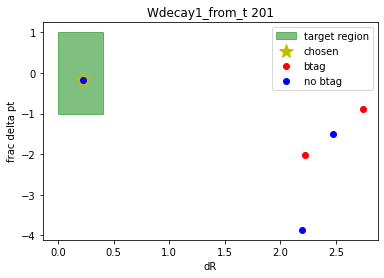

Decay product pt= 26149.55078125
Jet pts= [1.27e+05, 7.9e+04, 6.55e+04, 4.96e+04, 3.09e+04]
Decay product phi= 1.268282413482666
Jet phis= [-0.928, 1.33, 2.89, -0.801, 1.49]
Decay product eta= 1.09133780002594
Jet etas= [1.04, -1.13, -0.779, -0.703, 1.13]


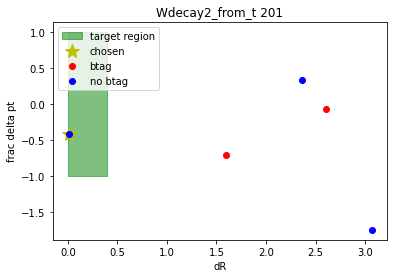

Decay product pt= 46276.578125
Jet pts= [1.27e+05, 7.9e+04, 6.55e+04, 4.96e+04, 3.09e+04]
Decay product phi= 2.881230115890503
Jet phis= [-0.928, 1.33, 2.89, -0.801, 1.49]
Decay product eta= 0.0
Jet etas= [1.04, -1.13, -0.779, -0.703, 1.13]


In [7]:
# Calculate particle vectors
b_from_t_vec = vector.array({"pt":parton_tree04['MC_b_from_t_afterFSR_pt'],"eta":parton_tree04['MC_b_from_t_afterFSR_eta'],"phi":parton_tree04['MC_b_from_t_afterFSR_phi'],"E":parton_tree04['MC_b_from_t_afterFSR_E']})
b_from_tbar_vec = vector.array({"pt":parton_tree04['MC_b_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_b_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_b_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_b_from_tbar_afterFSR_E']})
Wdecay1_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_t_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_t_afterFSR_E']})
Wdecay2_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_t_afterFSR_y'],"phi":parton_tree04['MC_Wdecay2_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_t_afterFSR_E']})   # Approx eta with y for now, since eta empty
Wdecay1_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_E']})
Wdecay2_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_E']})

# Define some helpful ranges
had_range = list(range(1,9))+list(range(-8,0))                     # Quarks have pdgid 1 to 8 (negatives indicate antiparticles)
lep_range = list(range(11,19))+list(range(-18,10))                 # Leptons have pdgid 11 to 18
bos_range = list(range(21,26))+list(range(-25,20))+[9,37,-9,-37]   # Bosons have pdgid 21 to 25, and 9, and 37


for i in df_notall['Event']:



     # Calculate the jet vectors for this event, as well as get the btags
    jet_vectors = vector.array({"pt":reco_tree04['jet_pt'][i],"eta":reco_tree04['jet_eta'][i],"phi":reco_tree04['jet_phi'][i],"E":reco_tree04['jet_e'][i]})
    jet_btags = np.array(reco_tree04['jet_btagged'][i])

    particle_dict = {'b_from_t':{'dRs':jet_vectors.deltaR(b_from_t_vec[i]),'frac_delta_pts':((b_from_t_vec[i].pt - jet_vectors.pt)/b_from_t_vec[i].pt)},'b_from_tbar':{'dRs':jet_vectors.deltaR(b_from_tbar_vec[i]),'frac_delta_pts':((b_from_tbar_vec[i].pt - jet_vectors.pt)/b_from_tbar_vec[i].pt)}}
    if parton_tree04['MC_Wdecay1_from_t_afterFSR_pdgid'][i] in had_range or parton_tree04['MC_Wdecay2_from_t_afterFSR_pdgid'][i] in had_range:
        particle_dict['Wdecay1_from_t'] = {'dRs':jet_vectors.deltaR(Wdecay1_from_t_vec[i]),'frac_delta_pts':((Wdecay1_from_t_vec[i].pt - jet_vectors.pt)/Wdecay1_from_t_vec[i].pt)}
        particle_dict['Wdecay2_from_t'] = {'dRs':jet_vectors.deltaR(Wdecay2_from_t_vec[i]),'frac_delta_pts':((Wdecay2_from_t_vec[i].pt - jet_vectors.pt)/Wdecay2_from_t_vec[i].pt)}
    elif parton_tree04['MC_Wdecay1_from_tbar_afterFSR_pdgid'][i] in had_range or parton_tree04['MC_Wdecay2_from_tbar_afterFSR_pdgid'][i] in had_range:
        particle_dict['Wdecay1_from_tbar'] = {'dRs':jet_vectors.deltaR(Wdecay1_from_tbar_vec[i]),'frac_delta_pts':((Wdecay1_from_tbar_vec[i].pt - jet_vectors.pt)/Wdecay1_from_tbar_vec[i].pt)}
        particle_dict['Wdecay2_from_tbar'] = {'dRs':jet_vectors.deltaR(Wdecay2_from_tbar_vec[i]),'frac_delta_pts':((Wdecay2_from_tbar_vec[i].pt - jet_vectors.pt)/Wdecay2_from_tbar_vec[i].pt)}
    else:
        print('WARNING: none of the W decays in event %d seem to be jets! What?!' % i)
        print('pdgids: %d, %d, %d, %d' % (parton_tree04['MC_Wdecay1_from_t_afterFSR_pdgid'][i] ,parton_tree04['MC_Wdecay2_from_t_afterFSR_pdgid'][i] ,parton_tree04['MC_Wdecay1_from_tbar_afterFSR_pdgid'][i] ,parton_tree04['MC_Wdecay2_from_tbar_afterFSR_pdgid'][i] ))


    for par in particle_dict:

        #if par not in df_notall[df_notall['Event']==i]['Parent'].to_list()[0]:

        dR_points_btag = []
        dR_points_nobtag = []
        pt_points_btag = []
        pt_points_nobtag = []

        for j in range(len(particle_dict[par]['dRs'])):
            if jet_btags[j]==1:
                dR_points_btag.append(particle_dict[par]['dRs'][j])
                pt_points_btag.append(particle_dict[par]['frac_delta_pts'][j])
            elif jet_btags[j]==0:
                dR_points_nobtag.append(particle_dict[par]['dRs'][j])
                pt_points_nobtag.append(particle_dict[par]['frac_delta_pts'][j])

        plt.figure(par+' '+str(i))
        plt.title(par+' '+str(i))

        rect1 = matplotlib.patches.Rectangle((0,-1), 0.4, 2, color='green',alpha=0.5,label='target region')
        plt.gca().add_patch(rect1)  # gca = 'grab current axis

        if par in df_notall[df_notall['Event']==i]['Parent'].to_list()[0]:
            index = df_notall[df_notall['Event']==i]['Parent'].to_list()[0].index(par)
            temp_df = df_notall[df_notall['Event']==i]
            plt.plot([temp_df['dR'].to_list()[0][index]],[temp_df['frac delta pt'].to_list()[0][index]],'y*',markersize=15,label='chosen')
            del temp_df

        plt.plot(dR_points_btag,pt_points_btag,'ro',label='btag')
        plt.plot(dR_points_nobtag,pt_points_nobtag,'bo',label='no btag')

        plt.legend()
        plt.xlabel('dR')
        plt.ylabel('frac delta pt')
        plt.show()

        print('Decay product pt=',parton_tree04['MC_'+par+'_afterFSR_pt'][i])
        print('Jet pts=',reco_tree04['jet_pt'][i])

        print('Decay product phi=',parton_tree04['MC_'+par+'_afterFSR_phi'][i])
        print('Jet phis=',reco_tree04['jet_phi'][i])

        print('Decay product eta=',parton_tree04['MC_'+par+'_afterFSR_eta'][i])
        print('Jet etas=',reco_tree04['jet_eta'][i])

    if i > 200: break
        

    

In [ ]:
# Calculate particle vectors
b_from_t_vec = vector.array({"pt":parton_tree04['MC_b_from_t_afterFSR_pt'],"eta":parton_tree04['MC_b_from_t_afterFSR_eta'],"phi":parton_tree04['MC_b_from_t_afterFSR_phi'],"E":parton_tree04['MC_b_from_t_afterFSR_E']})
b_from_tbar_vec = vector.array({"pt":parton_tree04['MC_b_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_b_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_b_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_b_from_tbar_afterFSR_E']})
Wdecay1_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_t_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_t_afterFSR_E']})
Wdecay2_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_t_afterFSR_y'],"phi":parton_tree04['MC_Wdecay2_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_t_afterFSR_E']})   # Approx eta with y for now, since eta empty
Wdecay1_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_E']})
Wdecay2_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_E']})


for i,event in enumerate(list(df04_bad['Event'])):

    dR_points_btag = []
    dR_points_nobtag = []
    pt_points_btag = []
    pt_points_nobtag = []

    min_dR = 100000
    and_the_pt = 0

    plot = True


    par = list(df04_bad['Parent'])[i]

    if par=='b_from_t':
        par_vec=b_from_t_vec[event]
    elif par=='b_from_tbar':
        par_vec=b_from_tbar_vec[event]
    elif par=='Wdecay1_from_t':
        continue
        par_vec=Wdecay1_from_t_vec[event]
    elif par=='Wdecay2_from_t':
        continue
        par_vec=Wdecay2_from_t_vec[event]
    elif par=='Wdecay1_from_tbar':
        continue
        par_vec=Wdecay1_from_tbar_vec[event]
    elif par=='Wdecay2_from_tbar':
        continue
        par_vec=Wdecay2_from_tbar_vec[event]


    for j in range(int(reco_tree04['jet_n'][event])):
        jet_vec = vector.obj(pt=reco_tree04['jet_pt'][event][j],eta=reco_tree04['jet_eta'][event][j],phi=reco_tree04['jet_phi'][event][j],E=reco_tree04['jet_e'][event][j])
        this_dR = par_vec.deltaR(jet_vec)
        this_pt = (par_vec.pt-jet_vec.pt)/par_vec.pt
        
        if reco_tree04['jet_btagged'][event][j]==1:
            dR_points_btag.append(this_dR)
            pt_points_btag.append(this_pt)
        else:
            dR_points_nobtag.append(this_dR)
            pt_points_nobtag.append(this_pt)

        if this_dR < 0.4 and this_pt > -1:
            plot = True


    if plot==True:


        plt.figure(str(event))
        plt.title(str(event)+' '+par)

        rect1 = matplotlib.patches.Rectangle((0,-1), 0.4, 2, color='green',alpha=0.5,label='target region')
        plt.gca().add_patch(rect1)  # gca = 'grab current axis
        plt.plot([list(df04_bad['dR'])[i]],[list(df04_bad['frac delta pt'])[i]],'y*',markersize=15,label='chosen')
        plt.plot(dR_points_btag,pt_points_btag,'ro',label='btag')
        plt.plot(dR_points_nobtag,pt_points_nobtag,'bo',label='no btag')

        plt.legend()
        plt.xlabel('dR')
        plt.ylabel('frac delta pt')
        plt.show()